# Graph Data and Analysis

## Introduction
Graphs are powerful mathematical structures that capture relational data in real-world systems. They consist of:
- **Nodes (vertices)**: Individual entities
- **Edges (links)**: Relationships between entities

This tutorial explores various graph types, their properties, and analysis techniques using NetworkX.


In [153]:
!pip install python-louvain

  Using cached python-louvain-0.16.tar.gz (204 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=9b61159192275b7b90502f8eb992aa1b4ddd3c8d7ffc1e75bfc50fd54907218f
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\40\f1\e3\485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain


In [1]:
# Graph Data and Analysis Tutorial
# Based on presentation by Raghav Borikar, IIT Bhilai

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community.community_louvain as community_louvain
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib style for better plots
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

## Types of Graphs Implementation

### === GRAPH TYPES DEMONSTRATION ===

1. UNDIRECTED GRAPH


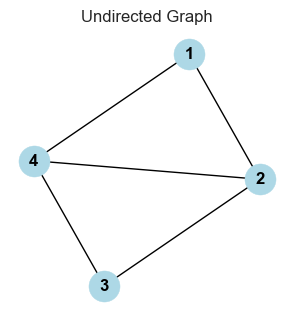

In [3]:
# 1. Undirected Graph
print("1. UNDIRECTED GRAPH")
G_undirected = nx.Graph()
G_undirected.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
nx.draw(G_undirected, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=12, font_weight='bold')
plt.title('Undirected Graph')
plt.show()

2. DIRECTED GRAPH


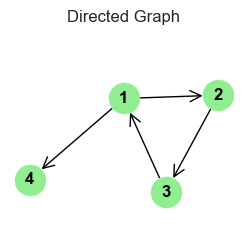

In [4]:
# 2. Directed Graph
print("2. DIRECTED GRAPH")
G_directed = nx.DiGraph()
G_directed.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])

plt.subplot(2, 3, 2)
nx.draw(G_directed, with_labels=True, node_color='lightgreen', 
        node_size=500, font_size=12, font_weight='bold', 
        arrowsize=20, arrowstyle='->')
plt.title('Directed Graph')
plt.show()

3. WEIGHTED GRAPH


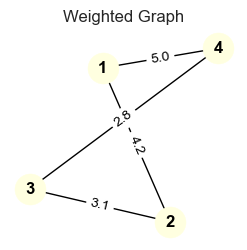

In [5]:
# 3. Weighted Graph
print("3. WEIGHTED GRAPH")
G_weighted = nx.Graph()
G_weighted.add_edge(1, 2, weight=4.2)
G_weighted.add_edge(2, 3, weight=3.1)
G_weighted.add_edge(3, 4, weight=2.8)
G_weighted.add_edge(1, 4, weight=5.0)

plt.subplot(2, 3, 3)
pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True, node_color='lightyellow', 
        node_size=500, font_size=12, font_weight='bold')
labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)
plt.title('Weighted Graph')
plt.show()

4. BIPARTITE GRAPH


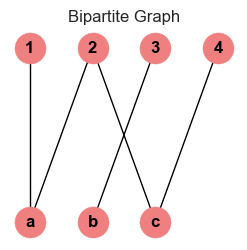

In [6]:
# 4. Bipartite Graph
print("4. BIPARTITE GRAPH")
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)  # Set 0
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)  # Set 1
B.add_edges_from([(1, 'a'), (2, 'a'), (3, 'b'), (4, 'c'), (2, 'c')])

plt.subplot(2, 3, 4)
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
bottom_nodes = set(B) - top_nodes
pos = {}
pos.update((n, (i, 1)) for i, n in enumerate(top_nodes))
pos.update((n, (i, 0)) for i, n in enumerate(bottom_nodes))
nx.draw(B, pos, with_labels=True, node_color='lightcoral', 
        node_size=500, font_size=12, font_weight='bold')
plt.title('Bipartite Graph')
plt.show()

## Some Graph Types Used in the Tutorial

### Comparison of Graph Models

| Graph Type         | Model Name          | Key Characteristics                                                                 | Degree Distribution       | Clustering Coefficient | Average Path Length     | Real-World Analogy                                |
|--------------------|---------------------|--------------------------------------------------------------------------------------|---------------------------|-------------------------|--------------------------|---------------------------------------------------|
| Random Graph       | Gilbert (G(n, p))    | Edges are added between nodes with fixed probability _p_                             | Poisson                   | Low                     | Short (log(n))           | Telephone networks, early Internet topology       |
| Erdős–Rényi Graph  | G(n, p) / G(n, m)    | Special case of random graphs with either _p_ or _m_ edges                           | Poisson                   | Low                     | Short (log(n))           | Simplified models of random networks              |
| Barabási–Albert    | Preferential Attachment | Nodes prefer to attach to highly connected nodes (rich-get-richer mechanism)       | Power-law (Scale-free)    | Low                     | Short                    | Social networks, citation networks                |
| Scale-Free Network | General class        | Degree distribution follows power-law, hubs dominate                                 | Power-law                 | Varies (often low)      | Very short (ultra-small) | World Wide Web, protein interaction networks      |
| Watts–Strogatz     | Small-world Model    | Rewires regular graph with probability _β_, balances clustering & short paths        | Not power-law             | High                    | Short                    | Social networks, neural networks                  |


### Key Distinctions

#### Construction Process

Random/Erdős-Rényi: Each possible edge exists independently with probability p

Barabási-Albert: Grows incrementally, new nodes preferentially attach to high-degree nodes

Scale-Free: Exhibits power-law degree distribution through various mechanisms

Watts-Strogatz: Starts with regular ring lattice, then rewires edges with probability p

#### Structural Characteristics

Erdős-Rényi: Homogeneous structure, no hubs

Barabási-Albert: Heterogeneous with prominent hubs

Scale-Free: Hub-dominated architecture with power-law scaling

Watts-Strogatz: Balanced between local clustering and global connectivity

#### Phase Transitions

Erdős-Rényi: Sharp connectivity threshold at p = ln(n)/n

Barabási-Albert: No phase transition due to growth mechanism

Watts-Strogatz: Gradual transition from regular to random as rewiring probability increases

## === GRAPH PROPERTIES ANALYSIS ===

In [11]:
# Create a sample graph for analysis
G = nx.erdos_renyi_graph(25, 0.1, seed=42)

### 1. DEGREE DISTRIBUTION

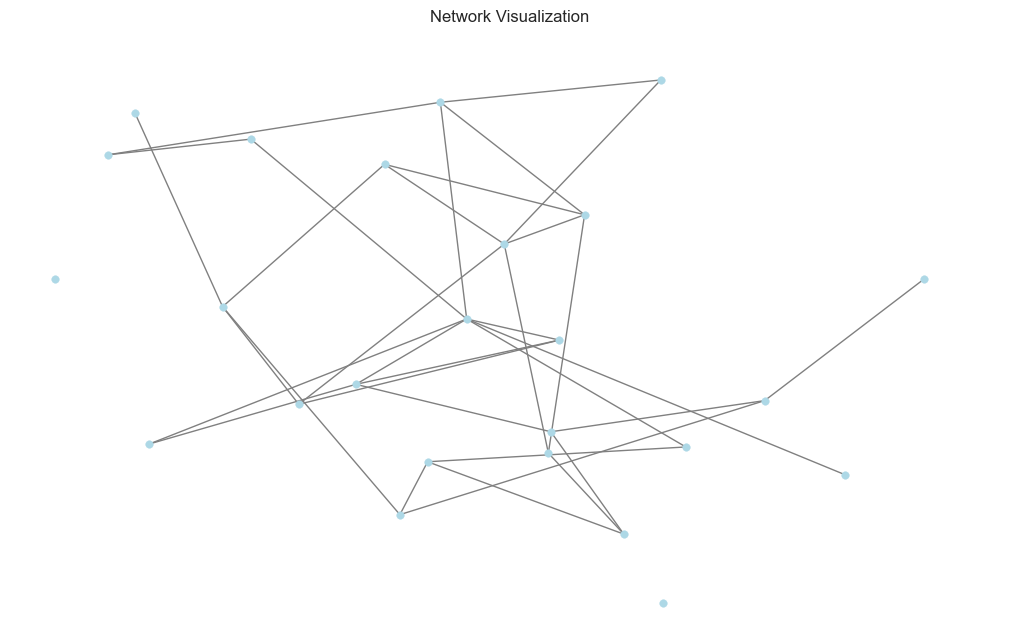

In [245]:
# Network Visualization
pos = nx.spring_layout(G, k=1, iterations=50)
nx.draw(G, pos, node_size=30, node_color='lightblue', 
        edge_color='gray', alpha=1)
plt.title('Network Visualization')


#plt.tight_layout()
plt.show()

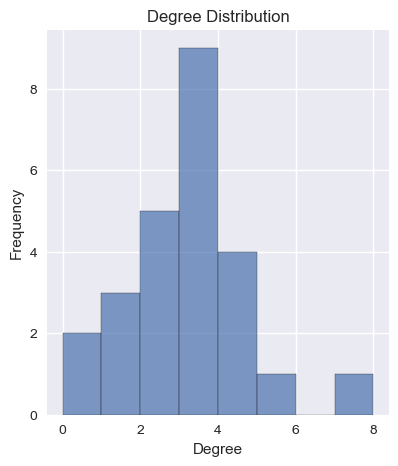

In [247]:
# Degree Distribution

degrees = [d for n, d in G.degree()]
degree_counts = Counter(degrees)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(degrees, bins=range(max(degrees)+2), alpha=0.7, edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [249]:
# Degree distribution statistics
print(f"Average degree: {np.mean(degrees):.2f}")
print(f"Degree variance: {np.var(degrees):.2f}")
print(f"Max degree: {max(degrees)}")
print(f"Min degree: {min(degrees)}")

Average degree: 2.72
Degree variance: 2.28
Max degree: 7
Min degree: 0


### 2. CONNECTIVITY ANALYSIS

In [251]:
# Connectivity Analysis

is_connected = nx.is_connected(G)
num_components = nx.number_connected_components(G)

print(f"Graph is connected: {is_connected}")
print(f"Number of connected components: {num_components}")

if not is_connected:
    largest_cc = max(nx.connected_components(G), key=len)
    print(f"Size of largest connected component: {len(largest_cc)}")

Graph is connected: False
Number of connected components: 3
Size of largest connected component: 23


### 3. CLUSTERING ANALYSIS

Average clustering coefficient: 0.1185
Global clustering coefficient: 0.1379


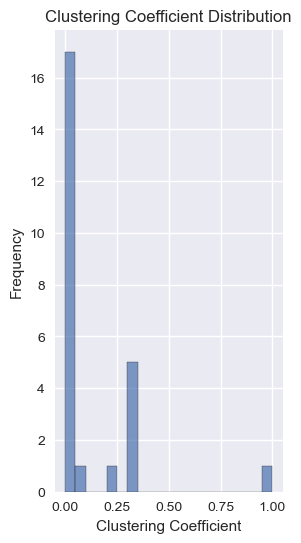

In [253]:
# Clustering Analysis
avg_clustering = nx.average_clustering(G)
clustering_dict = nx.clustering(G)

plt.subplot(1, 3, 2)
clustering_values = list(clustering_dict.values())
plt.hist(clustering_values, bins=20, alpha=0.7, edgecolor='black')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

print(f"Average clustering coefficient: {avg_clustering:.4f}")
print(f"Global clustering coefficient: {nx.transitivity(G):.4f}")

## === CENTRALITY MEASURES ANALYSIS ===

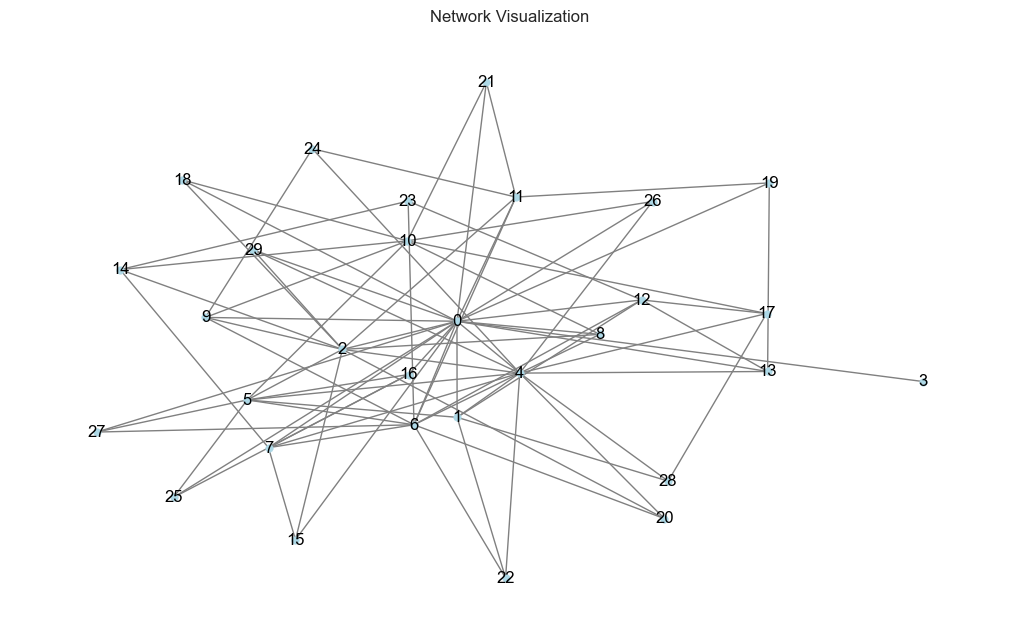

In [271]:
# Create a more complex graph for centrality analysis
G_centrality = nx.barabasi_albert_graph(n= 30, m =3)

# Network Visualization
pos = nx.spring_layout(G_centrality, k=1, iterations=50)
nx.draw(G_centrality, pos, with_labels=True, node_size=30, node_color='lightblue', 
        edge_color='gray', alpha=1)
plt.title('Network Visualization')

#plt.tight_layout()
plt.show()

In [265]:
# Calculate all centrality measures
degree_centrality = nx.degree_centrality(G_centrality)
betweenness_centrality = nx.betweenness_centrality(G_centrality)
closeness_centrality = nx.closeness_centrality(G_centrality)
eigenvector_centrality = nx.eigenvector_centrality(G_centrality)

### 1. DEGREE CENTRALITY

In [267]:
print("Measures the number of direct connections a node has")
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:")
for node, centrality in top_degree:
    print(f"Node {node}: {centrality:.4f}")

Measures the number of direct connections a node has
Top 5 nodes by degree centrality:
Node 4: 0.5862
Node 12: 0.5172
Node 2: 0.4828
Node 11: 0.3793
Node 0: 0.2414


### 2. BETWEENNESS CENTRALITY

In [273]:
print("Measures how often a node lies on the shortest path between other nodes")
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by betweenness centrality:")
for node, centrality in top_betweenness:
    print(f"Node {node}: {centrality:.4f}")

Measures how often a node lies on the shortest path between other nodes
Top 5 nodes by betweenness centrality:
Node 4: 0.2677
Node 12: 0.2003
Node 2: 0.1676
Node 11: 0.0992
Node 0: 0.0831


### 3. CLOSENESS CENTRALITY

In [275]:
print("Measures how close a node is to all other nodes in the network")
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by closeness centrality:")
for node, centrality in top_closeness:
    print(f"Node {node}: {centrality:.4f}")

Measures how close a node is to all other nodes in the network
Top 5 nodes by closeness centrality:
Node 4: 0.7073
Node 2: 0.6591
Node 12: 0.6444
Node 11: 0.6042
Node 0: 0.5370


### 4. EIGENVECTOR CENTRALITY

In [277]:
print("Measures the influence of a node based on the centrality of its neighbors")
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by eigenvector centrality:")
for node, centrality in top_eigenvector:
    print(f"Node {node}: {centrality:.4f}")


Measures the influence of a node based on the centrality of its neighbors
Top 5 nodes by eigenvector centrality:
Node 4: 0.4235
Node 2: 0.3780
Node 12: 0.3446
Node 11: 0.3033
Node 14: 0.2053


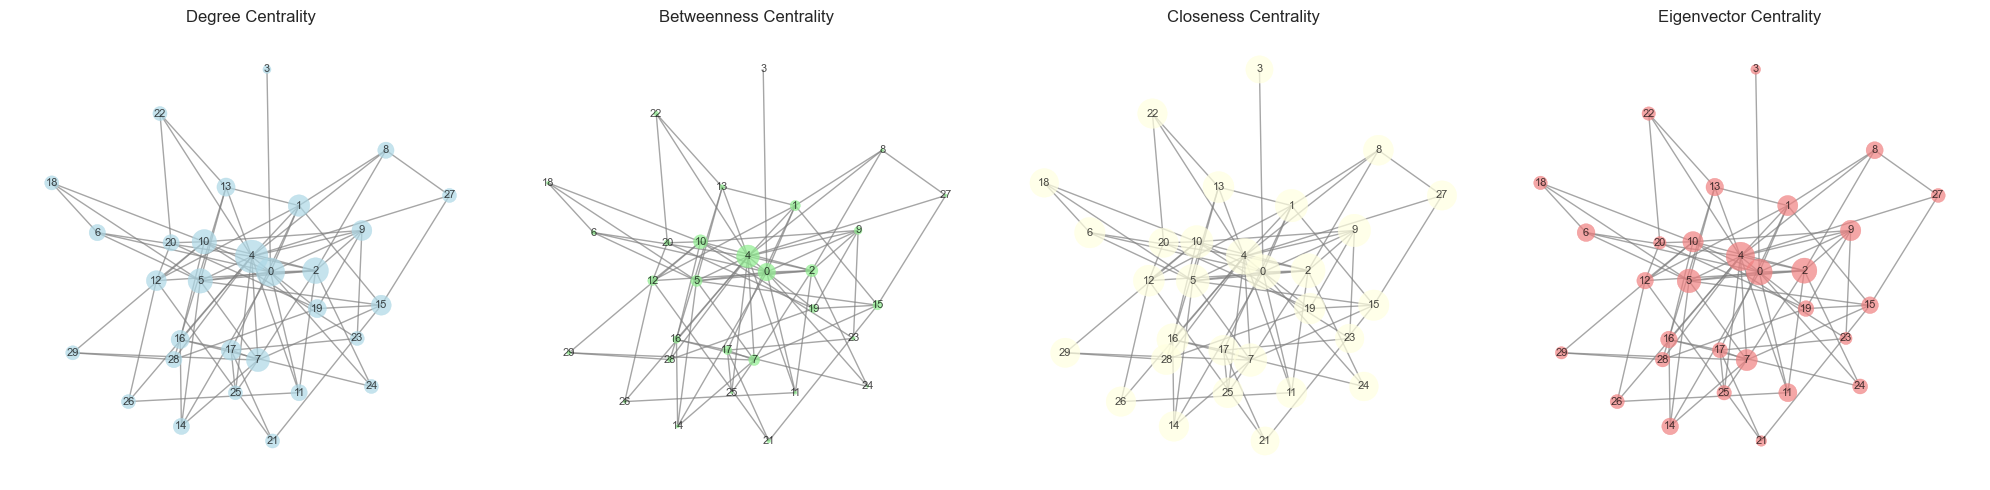

In [100]:
# Visualization of centrality measures
plt.figure(figsize=(20, 5))

pos = nx.spring_layout(G_centrality, k=1, iterations=50)

# Degree centrality visualization
plt.subplot(1, 4, 1)
node_sizes = [degree_centrality[node] * 1000 for node in G_centrality.nodes()]
nx.draw(G_centrality, pos, node_size=node_sizes, node_color='lightblue', 
        edge_color='gray', alpha=0.7, with_labels=True, font_size=8)
plt.title('Degree Centrality')

# Betweenness centrality visualization
plt.subplot(1, 4, 2)
node_sizes = [betweenness_centrality[node] * 1000 for node in G_centrality.nodes()]
nx.draw(G_centrality, pos, node_size=node_sizes, node_color='lightgreen', 
        edge_color='gray', alpha=0.7, with_labels=True, font_size=8)
plt.title('Betweenness Centrality')

# Closeness centrality visualization
plt.subplot(1, 4, 3)
node_sizes = [closeness_centrality[node] * 1000 for node in G_centrality.nodes()]
nx.draw(G_centrality, pos, node_size=node_sizes, node_color='lightyellow', 
        edge_color='gray', alpha=0.7, with_labels=True, font_size=8)
plt.title('Closeness Centrality')

# Eigenvector centrality visualization
plt.subplot(1, 4, 4)
node_sizes = [eigenvector_centrality[node] * 1000 for node in G_centrality.nodes()]
nx.draw(G_centrality, pos, node_size=node_sizes, node_color='lightcoral', 
        edge_color='gray', alpha=0.7, with_labels=True, font_size=8)
plt.title('Eigenvector Centrality')

plt.tight_layout()
plt.show()

## === ASSORTATIVITY ANALYSIS ===

### 1. DEGREE ASSORTATIVITY

Measures the tendency of nodes to connect to others with similar degrees

In [18]:
# Random network
G_random = nx.erdos_renyi_graph(100, 0.05, seed=42)
assortativity_random = nx.degree_assortativity_coefficient(G_random)

# Scale-free network
G_scale_free = nx.barabasi_albert_graph(100, 5, seed=42)
assortativity_scale_free = nx.degree_assortativity_coefficient(G_scale_free)


# Small-world network
G_small_world = nx.watts_strogatz_graph(100, 5, 0.2, seed=42)
assortativity_small_world = nx.degree_assortativity_coefficient(G_small_world)

print(f"Random network assortativity: {assortativity_random:.4f}")
print(f"Scale-free network assortativity: {assortativity_scale_free:.4f}")
print(f"Small-world network assortativity: {assortativity_small_world:.4f}")

# Assortativity interpretation
print("\nAssortativity Interpretation:")
print("r > 0: Assortative (nodes prefer similar-degree neighbors)")
print("r < 0: Disassortative (nodes prefer different-degree neighbors)")
print("r ≈ 0: Random (no degree correlation)")

Random network assortativity: -0.0650
Scale-free network assortativity: -0.1898
Small-world network assortativity: -0.0884

Assortativity Interpretation:
r > 0: Assortative (nodes prefer similar-degree neighbors)
r < 0: Disassortative (nodes prefer different-degree neighbors)
r ≈ 0: Random (no degree correlation)


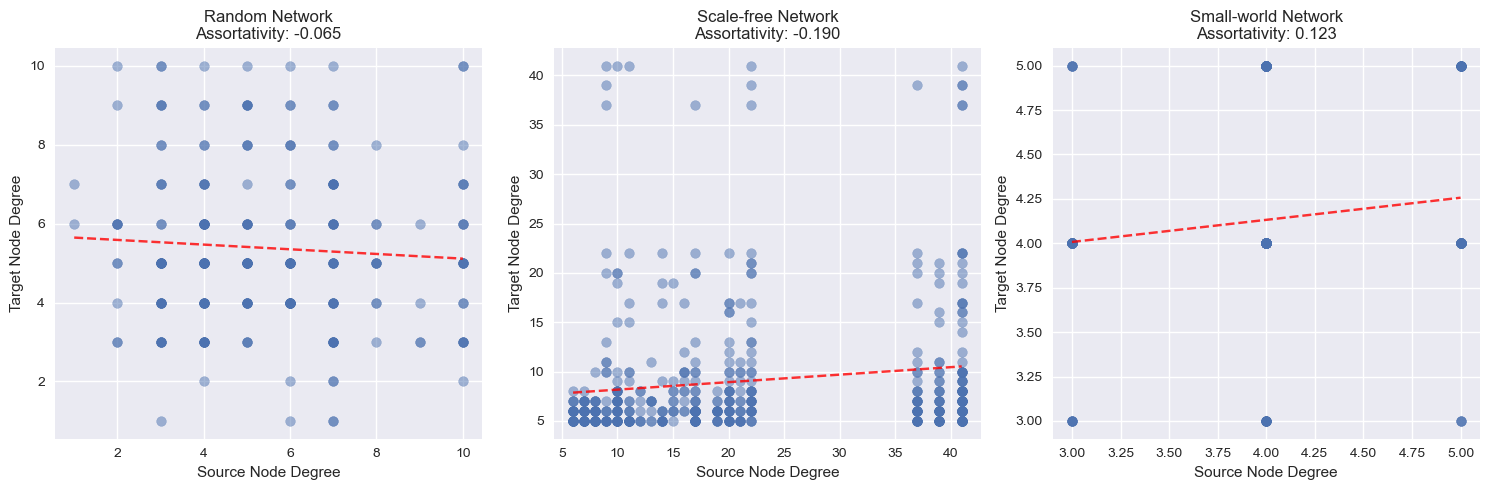

In [115]:
# Visualize degree correlation
plt.figure(figsize=(15, 5))

networks = [G_random, G_scale_free, G_small_world]
titles = ['Random Network', 'Scale-free Network', 'Small-world Network']
assortativity_values = [assortativity_random, assortativity_scale_free, assortativity_small_world]

for i, (G, title, r) in enumerate(zip(networks, titles, assortativity_values)):
    plt.subplot(1, 3, i+1)
    
    # Calculate degree correlations
    degrees = dict(G.degree())
    degree_pairs = [(degrees[u], degrees[v]) for u, v in G.edges()]
    
    if degree_pairs:
        source_degrees, target_degrees = zip(*degree_pairs)
        plt.scatter(source_degrees, target_degrees, alpha=0.5)
        plt.xlabel('Source Node Degree')
        plt.ylabel('Target Node Degree')
        plt.title(f'{title}\nAssortativity: {r:.3f}')
        
        # Add trend line
        z = np.polyfit(source_degrees, target_degrees, 1)
        p = np.poly1d(z)
        plt.plot(sorted(source_degrees), p(sorted(source_degrees)), "r--", alpha=0.8)

plt.tight_layout()
plt.show()


## === COMMUNITY DETECTION ANALYSIS ===

In [149]:
# Create a network with clear community structure
G_community = nx.connected_caveman_graph(4, 5)

print(f"Number of nodes: {G_community.number_of_nodes()}")
print(f"Number of edges: {G_community.number_of_edges()}")
print(f"Network density: {nx.density(G_community):.4f}")

Number of nodes: 20
Number of edges: 40
Network density: 0.2105


In [157]:
# Apply Louvain community detection
partition = community_louvain.best_partition(G_community)

In [159]:
# Calculate modularity using the built-in function
modularity = community_louvain.modularity(partition, G_community)

In [161]:
# Extract community information
num_communities = len(set(partition.values()))
community_sizes = [list(partition.values()).count(i) for i in set(partition.values())]

In [163]:
print(f"\n2. LOUVAIN ALGORITHM RESULTS")
print(f"Number of detected communities: {num_communities}")
print(f"Modularity: {modularity:.4f}")
print(f"Average community size: {np.mean(community_sizes):.2f}")
print(f"Community sizes: {sorted(community_sizes, reverse=True)}")




2. LOUVAIN ALGORITHM RESULTS
Number of detected communities: 4
Modularity: 0.6500
Average community size: 5.00
Community sizes: [5, 5, 5, 5]


In [165]:
# Detailed community analysis
print(f"\n3. COMMUNITY BREAKDOWN")
for community_id in set(partition.values()):
    nodes = [node for node in partition if partition[node] == community_id]
    print(f"Community {community_id}: {len(nodes)} nodes - {nodes}")


3. COMMUNITY BREAKDOWN
Community 0: 5 nodes - [15, 16, 17, 18, 19]
Community 1: 5 nodes - [10, 11, 12, 13, 14]
Community 2: 5 nodes - [5, 6, 7, 8, 9]
Community 3: 5 nodes - [0, 1, 2, 3, 4]


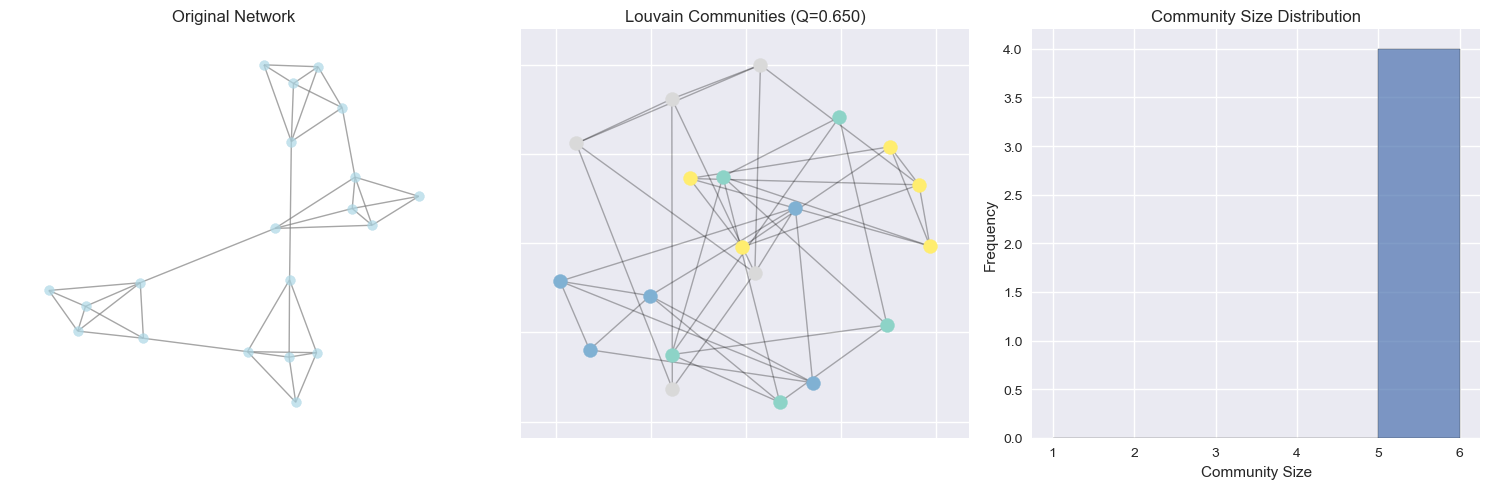

In [167]:
# Visualize communities
plt.figure(figsize=(15, 5))

# Original network
plt.subplot(1, 3, 1)
nx.draw(G_community, node_color='lightblue', node_size=50, 
        edge_color='gray', alpha=0.7)
plt.title('Original Network')

# Communities visualization with Louvain results
plt.subplot(1, 3, 2)
colors = plt.cm.Set3(np.linspace(0, 1, num_communities))
pos = nx.spring_layout(G_community, k=2, iterations=50)

for community_id in set(partition.values()):
    nodes = [node for node in partition if partition[node] == community_id]
    nx.draw_networkx_nodes(G_community, pos, nodelist=nodes, 
                          node_color=[colors[community_id]], node_size=100)

nx.draw_networkx_edges(G_community, pos, alpha=0.3)
plt.title(f'Louvain Communities (Q={modularity:.3f})')

# Community size distribution
plt.subplot(1, 3, 3)
plt.hist(community_sizes, bins=range(1, max(community_sizes)+2), 
         alpha=0.7, edgecolor='black')
plt.title('Community Size Distribution')
plt.xlabel('Community Size')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## == GIRVAN-NEWMAN COMMUNITY DETECTION TUTORIAL ===

In [178]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import numpy as np
import scipy.cluster.hierarchy as sch

In [180]:
# Create the Karate Club graph for demonstration
G = nx.karate_club_graph()

print("Initial Network Properties:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.4f}")

Initial Network Properties:
Number of nodes: 34
Number of edges: 78
Network density: 0.1390


In [202]:
# Generate community splits using Girvan-Newman
communities_generator = girvan_newman(G)

# Extract first 6 community splits to show progression
splits = []
for i in range(33):
    communities = next(communities_generator)
    splits.append(communities)
    print(f"Iteration {i+1}: {len(communities)} communities")

Iteration 1: 2 communities
Iteration 2: 3 communities
Iteration 3: 4 communities
Iteration 4: 5 communities
Iteration 5: 6 communities
Iteration 6: 7 communities
Iteration 7: 8 communities
Iteration 8: 9 communities
Iteration 9: 10 communities
Iteration 10: 11 communities
Iteration 11: 12 communities
Iteration 12: 13 communities
Iteration 13: 14 communities
Iteration 14: 15 communities
Iteration 15: 16 communities
Iteration 16: 17 communities
Iteration 17: 18 communities
Iteration 18: 19 communities
Iteration 19: 20 communities
Iteration 20: 21 communities
Iteration 21: 22 communities
Iteration 22: 23 communities
Iteration 23: 24 communities
Iteration 24: 25 communities
Iteration 25: 26 communities
Iteration 26: 27 communities
Iteration 27: 28 communities
Iteration 28: 29 communities
Iteration 29: 30 communities
Iteration 30: 31 communities
Iteration 31: 32 communities
Iteration 32: 33 communities
Iteration 33: 34 communities


In [204]:
# Function to plot graph with colored communities
def plot_communities(G, communities, iteration):
    """Plot graph with communities colored differently"""
    pos = nx.spring_layout(G, seed=42)  # Fixed seed for consistent layout
    plt.figure(figsize=(10, 8))
    
    # Create color mapping
    color_map = plt.cm.get_cmap('tab20')
    node_colors = []
    community_mapping = {}
    
    for idx, community in enumerate(communities):
        for node in community:
            community_mapping[node] = idx
    
    for node in G.nodes():
        node_colors.append(community_mapping[node])
    
    # Draw the graph
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                          cmap=color_map, node_size=400, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    
    plt.title(f'Girvan-Newman Community Detection - Iteration {iteration}\n'
              f'{len(communities)} Communities Detected')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print community details
    print(f"\nIteration {iteration} Communities:")
    for idx, community in enumerate(communities):
        print(f"Community {idx+1}: {sorted(list(community))} (size: {len(community)})")
    print("-" * 50)


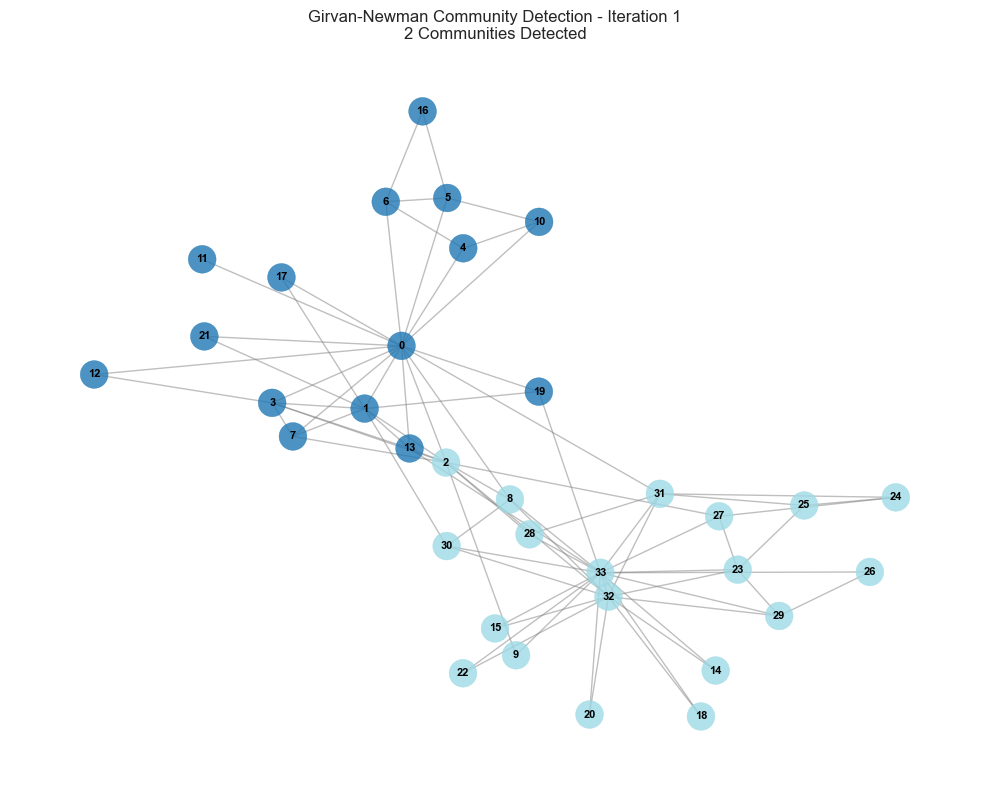


Iteration 1 Communities:
Community 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21] (size: 15)
Community 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] (size: 19)
--------------------------------------------------


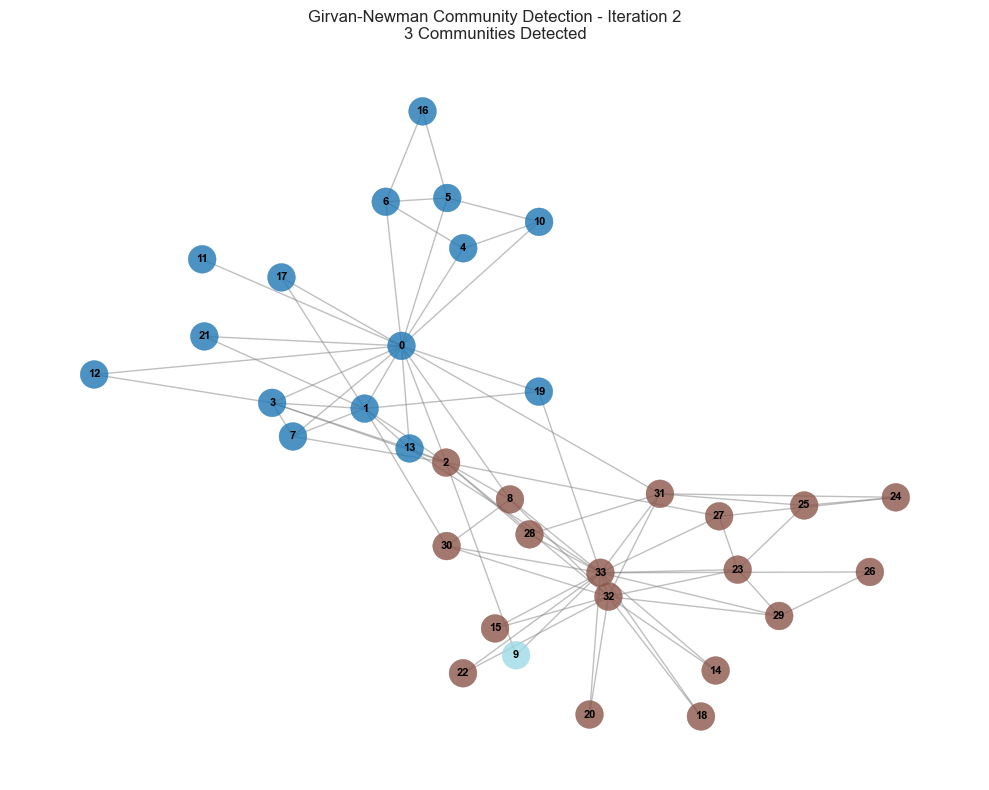


Iteration 2 Communities:
Community 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21] (size: 15)
Community 2: [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] (size: 18)
Community 3: [9] (size: 1)
--------------------------------------------------


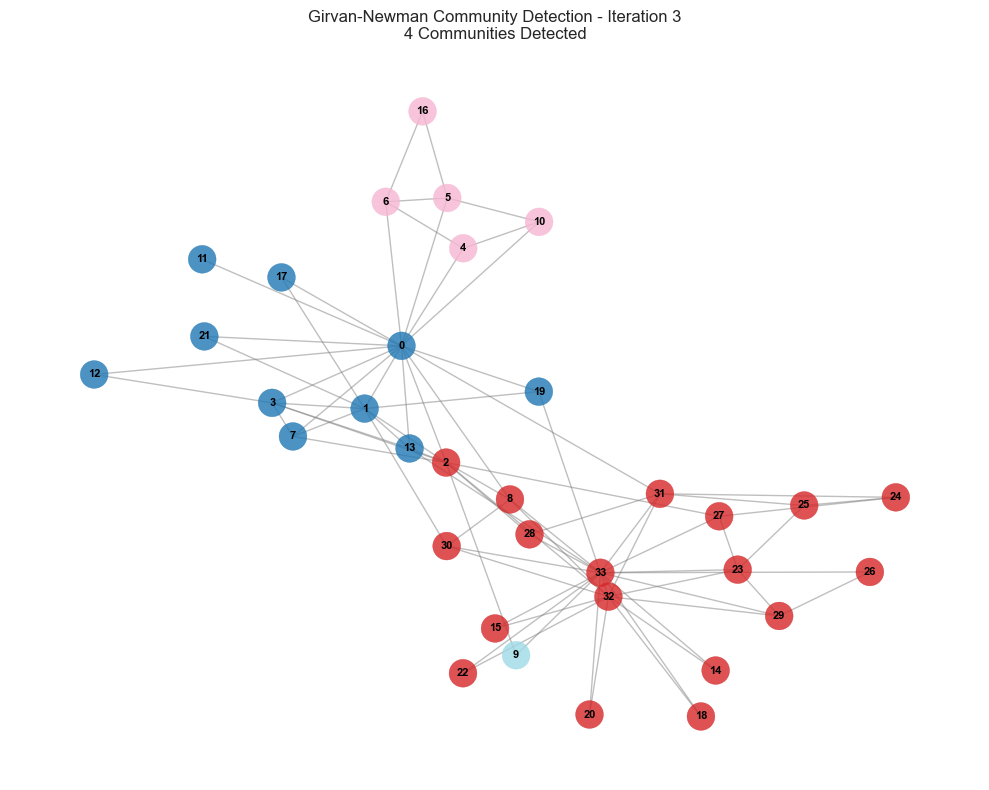


Iteration 3 Communities:
Community 1: [0, 1, 3, 7, 11, 12, 13, 17, 19, 21] (size: 10)
Community 2: [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] (size: 18)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [9] (size: 1)
--------------------------------------------------


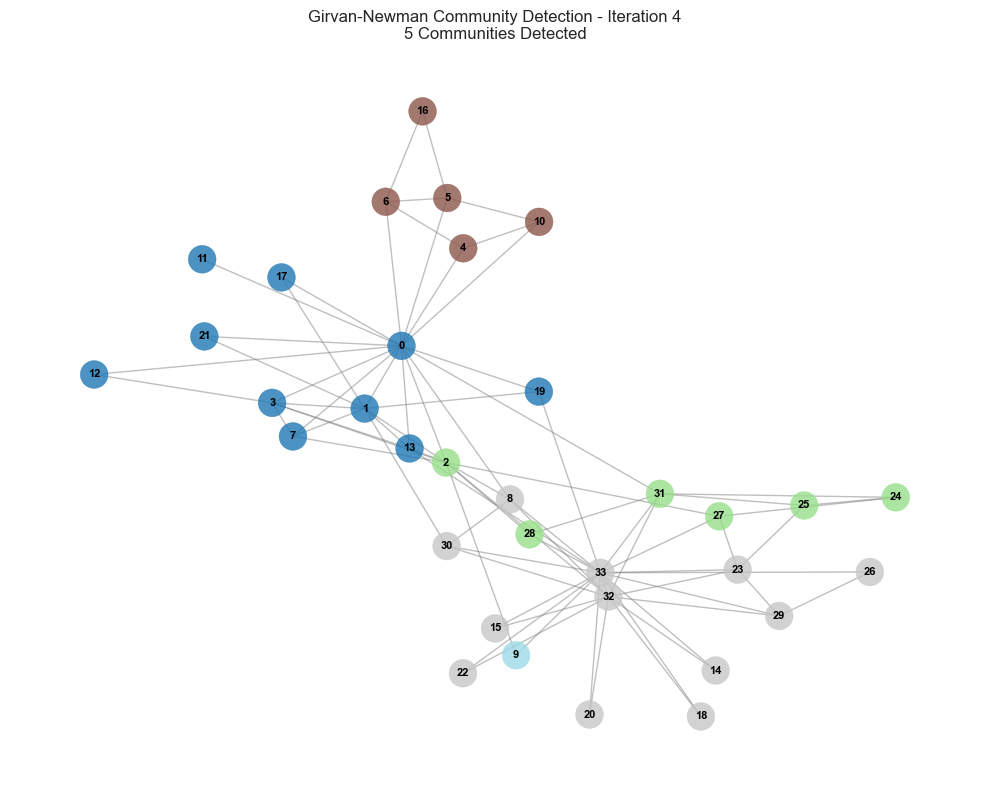


Iteration 4 Communities:
Community 1: [0, 1, 3, 7, 11, 12, 13, 17, 19, 21] (size: 10)
Community 2: [2, 24, 25, 27, 28, 31] (size: 6)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33] (size: 12)
Community 5: [9] (size: 1)
--------------------------------------------------


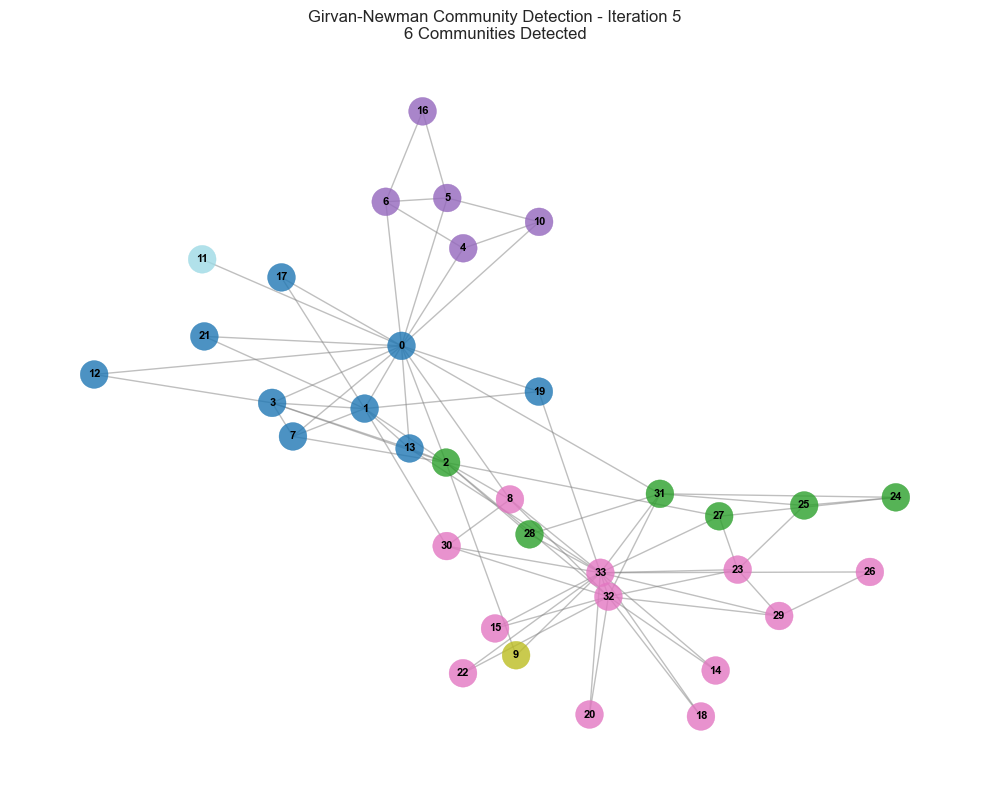


Iteration 5 Communities:
Community 1: [0, 1, 3, 7, 12, 13, 17, 19, 21] (size: 9)
Community 2: [2, 24, 25, 27, 28, 31] (size: 6)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33] (size: 12)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
--------------------------------------------------


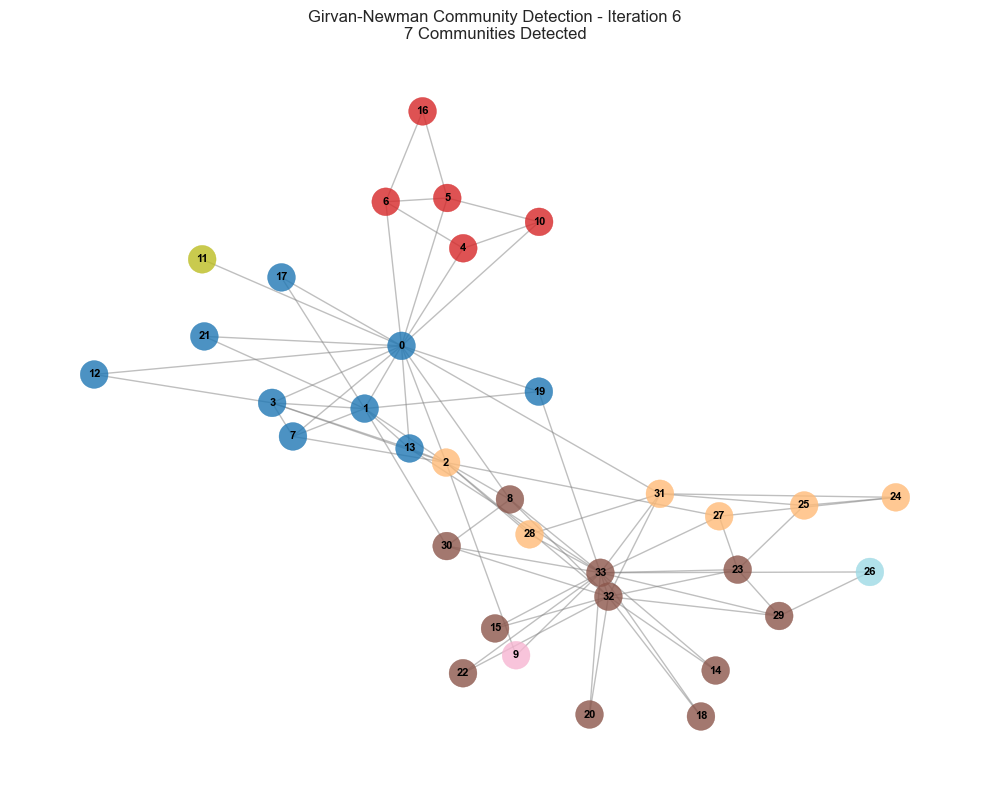


Iteration 6 Communities:
Community 1: [0, 1, 3, 7, 12, 13, 17, 19, 21] (size: 9)
Community 2: [2, 24, 25, 27, 28, 31] (size: 6)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33] (size: 11)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
Community 7: [26] (size: 1)
--------------------------------------------------


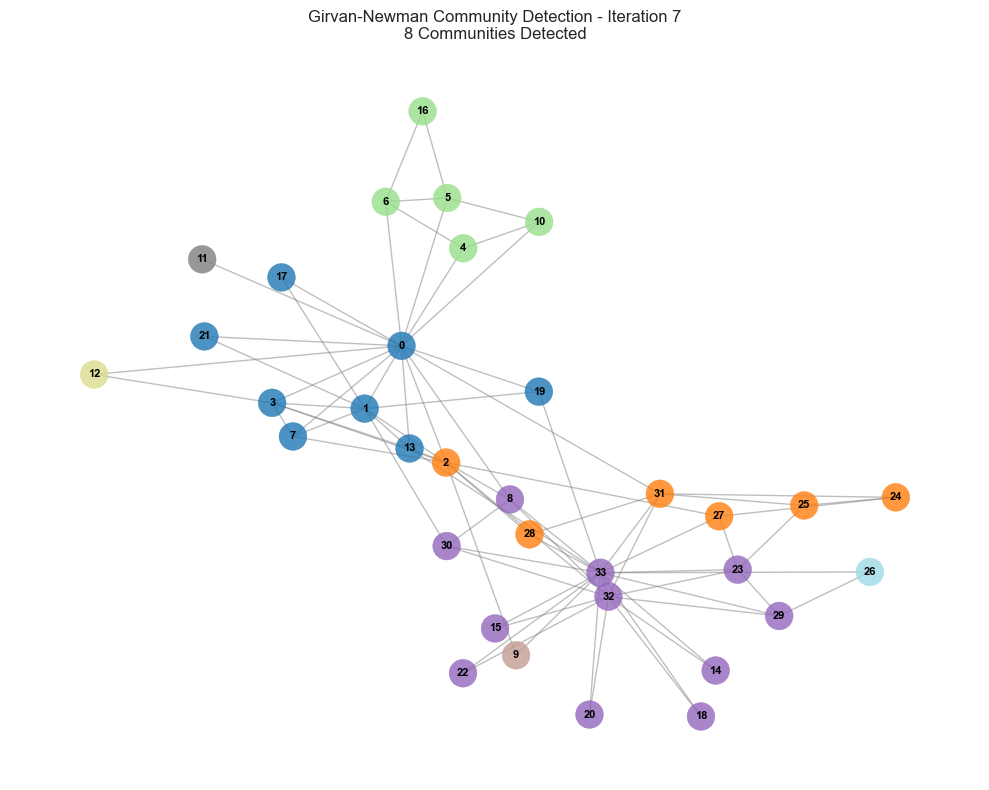


Iteration 7 Communities:
Community 1: [0, 1, 3, 7, 13, 17, 19, 21] (size: 8)
Community 2: [2, 24, 25, 27, 28, 31] (size: 6)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33] (size: 11)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
Community 7: [12] (size: 1)
Community 8: [26] (size: 1)
--------------------------------------------------


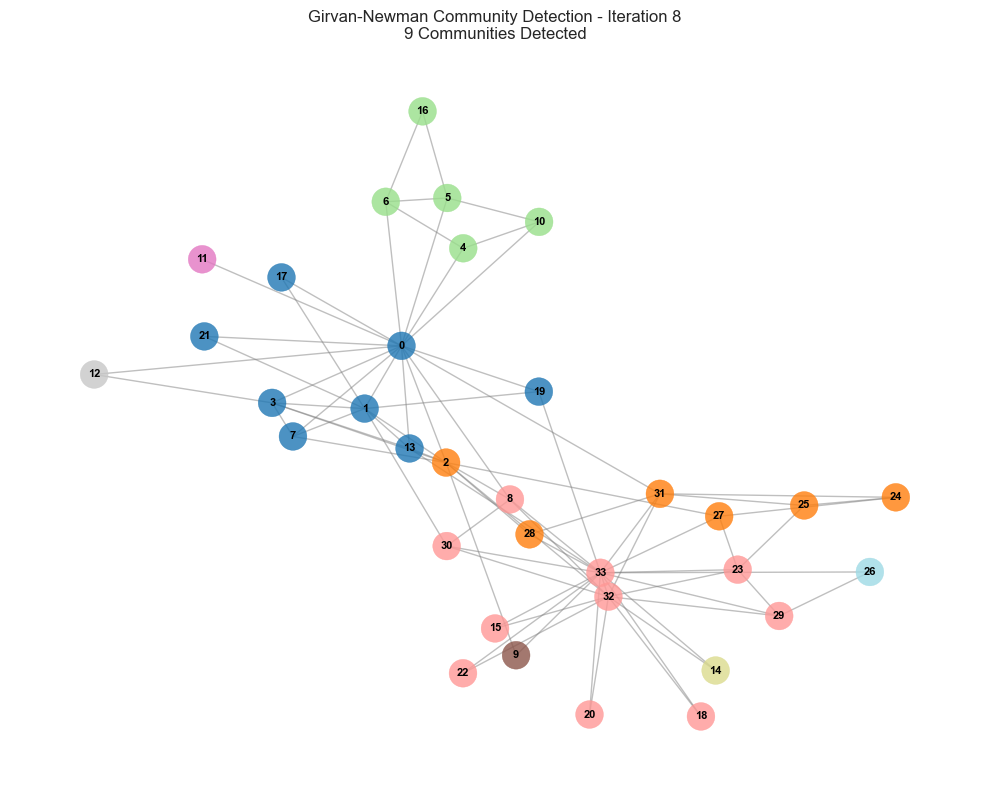


Iteration 8 Communities:
Community 1: [0, 1, 3, 7, 13, 17, 19, 21] (size: 8)
Community 2: [2, 24, 25, 27, 28, 31] (size: 6)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 15, 18, 20, 22, 23, 29, 30, 32, 33] (size: 10)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
Community 7: [12] (size: 1)
Community 8: [14] (size: 1)
Community 9: [26] (size: 1)
--------------------------------------------------


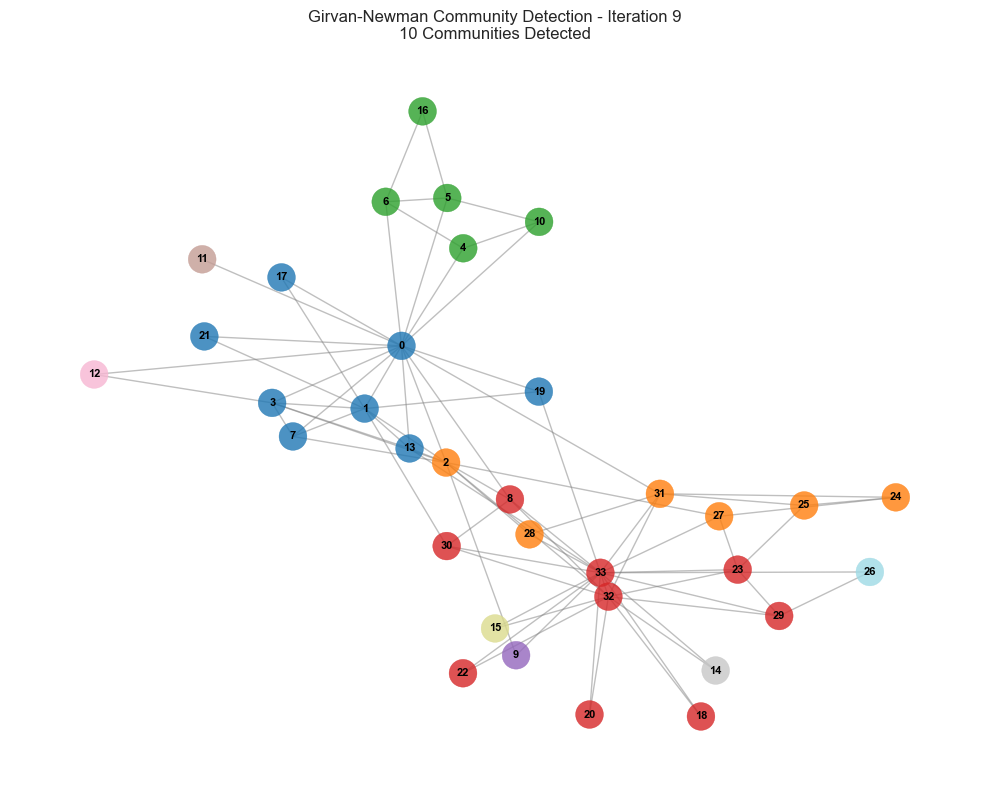


Iteration 9 Communities:
Community 1: [0, 1, 3, 7, 13, 17, 19, 21] (size: 8)
Community 2: [2, 24, 25, 27, 28, 31] (size: 6)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 18, 20, 22, 23, 29, 30, 32, 33] (size: 9)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
Community 7: [12] (size: 1)
Community 8: [14] (size: 1)
Community 9: [15] (size: 1)
Community 10: [26] (size: 1)
--------------------------------------------------


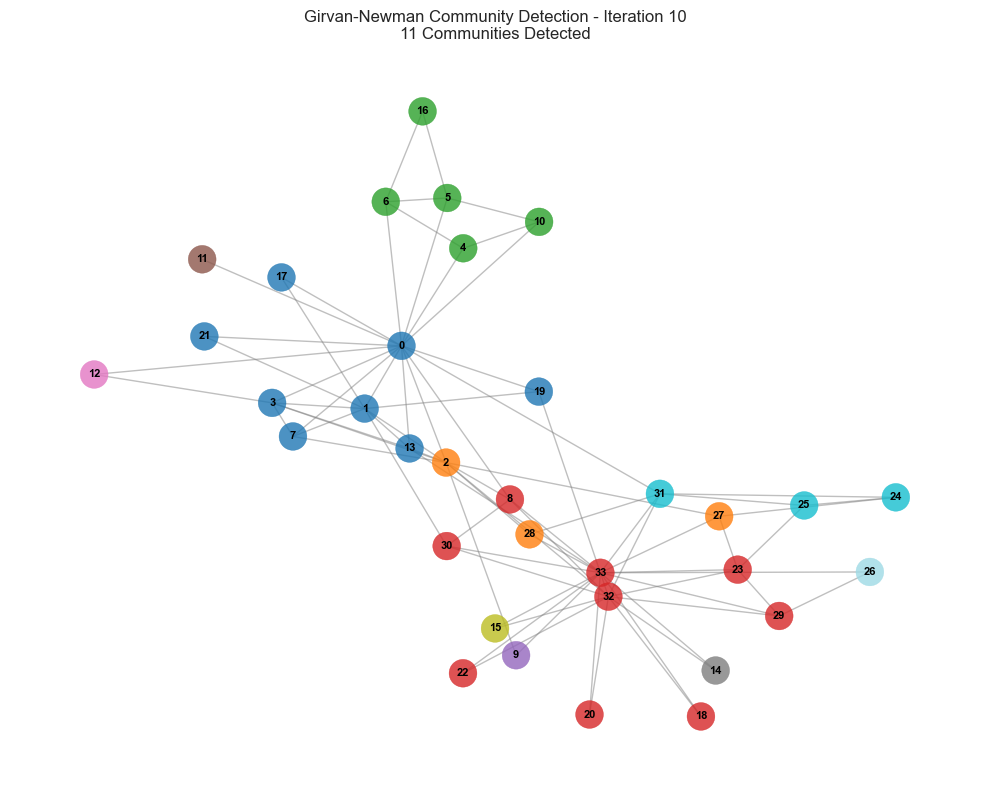


Iteration 10 Communities:
Community 1: [0, 1, 3, 7, 13, 17, 19, 21] (size: 8)
Community 2: [2, 27, 28] (size: 3)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 18, 20, 22, 23, 29, 30, 32, 33] (size: 9)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
Community 7: [12] (size: 1)
Community 8: [14] (size: 1)
Community 9: [15] (size: 1)
Community 10: [24, 25, 31] (size: 3)
Community 11: [26] (size: 1)
--------------------------------------------------


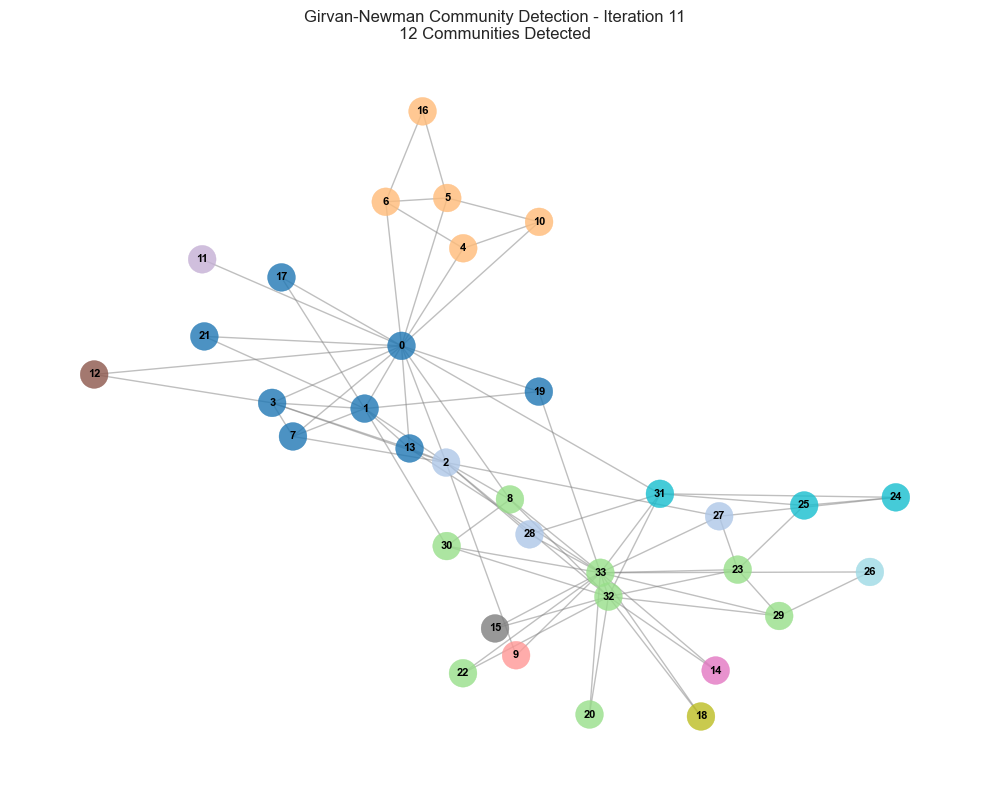


Iteration 11 Communities:
Community 1: [0, 1, 3, 7, 13, 17, 19, 21] (size: 8)
Community 2: [2, 27, 28] (size: 3)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 20, 22, 23, 29, 30, 32, 33] (size: 8)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
Community 7: [12] (size: 1)
Community 8: [14] (size: 1)
Community 9: [15] (size: 1)
Community 10: [18] (size: 1)
Community 11: [24, 25, 31] (size: 3)
Community 12: [26] (size: 1)
--------------------------------------------------


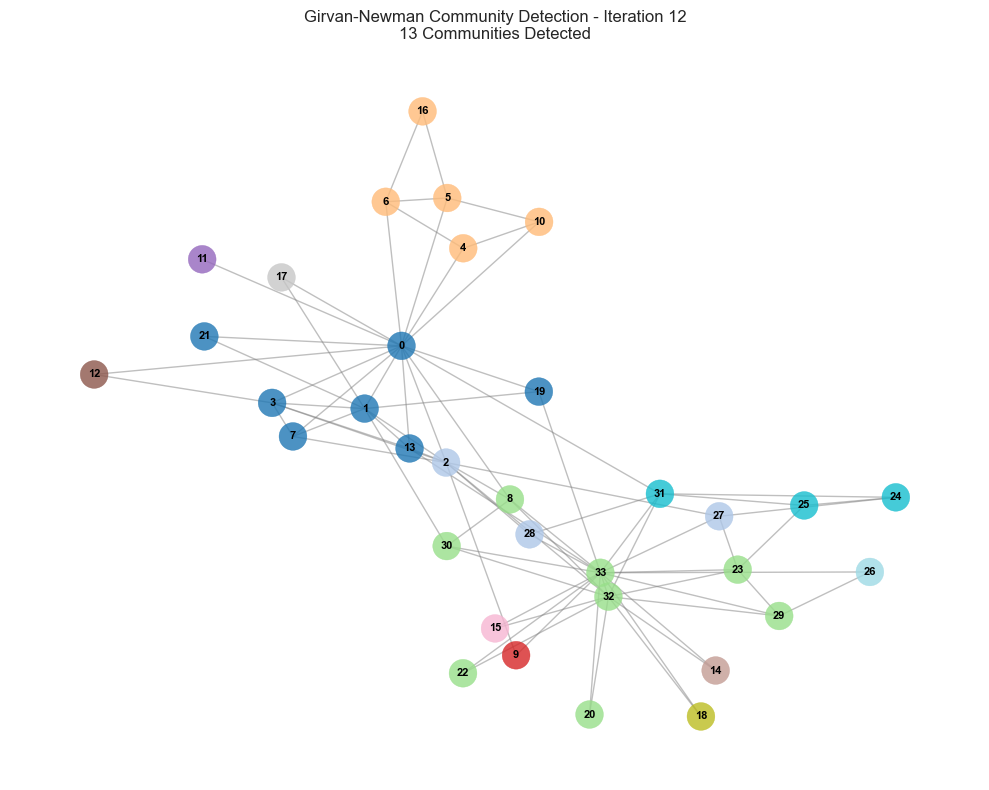


Iteration 12 Communities:
Community 1: [0, 1, 3, 7, 13, 19, 21] (size: 7)
Community 2: [2, 27, 28] (size: 3)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 20, 22, 23, 29, 30, 32, 33] (size: 8)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
Community 7: [12] (size: 1)
Community 8: [14] (size: 1)
Community 9: [15] (size: 1)
Community 10: [17] (size: 1)
Community 11: [18] (size: 1)
Community 12: [24, 25, 31] (size: 3)
Community 13: [26] (size: 1)
--------------------------------------------------


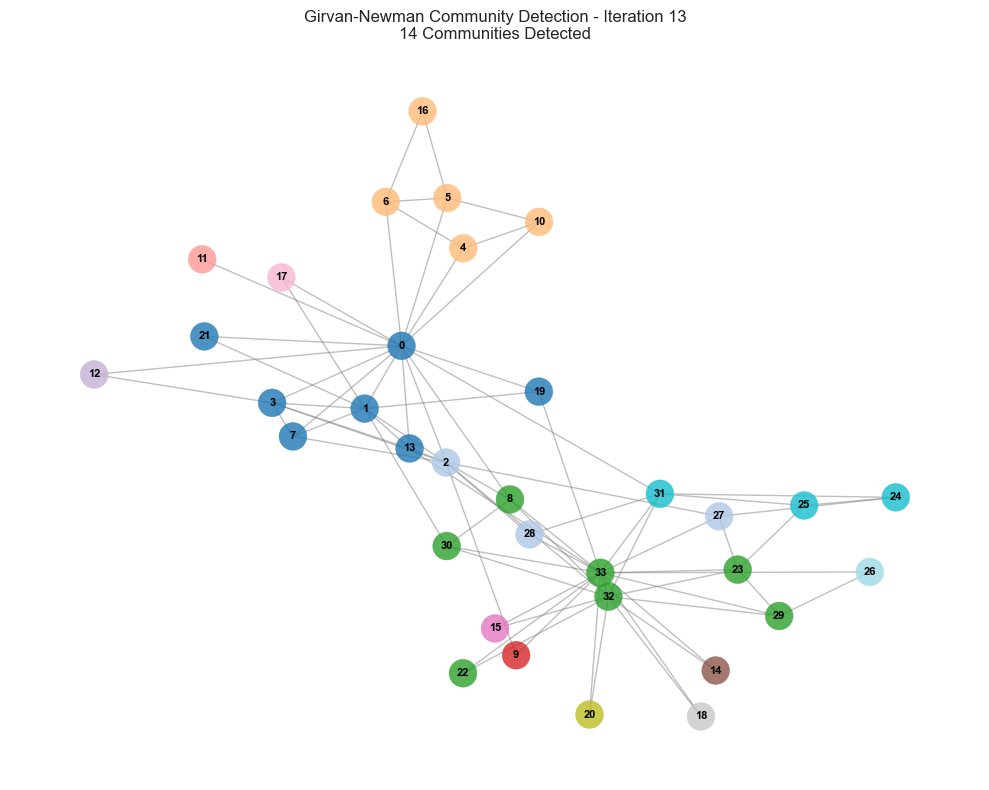


Iteration 13 Communities:
Community 1: [0, 1, 3, 7, 13, 19, 21] (size: 7)
Community 2: [2, 27, 28] (size: 3)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 22, 23, 29, 30, 32, 33] (size: 7)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
Community 7: [12] (size: 1)
Community 8: [14] (size: 1)
Community 9: [15] (size: 1)
Community 10: [17] (size: 1)
Community 11: [18] (size: 1)
Community 12: [20] (size: 1)
Community 13: [24, 25, 31] (size: 3)
Community 14: [26] (size: 1)
--------------------------------------------------


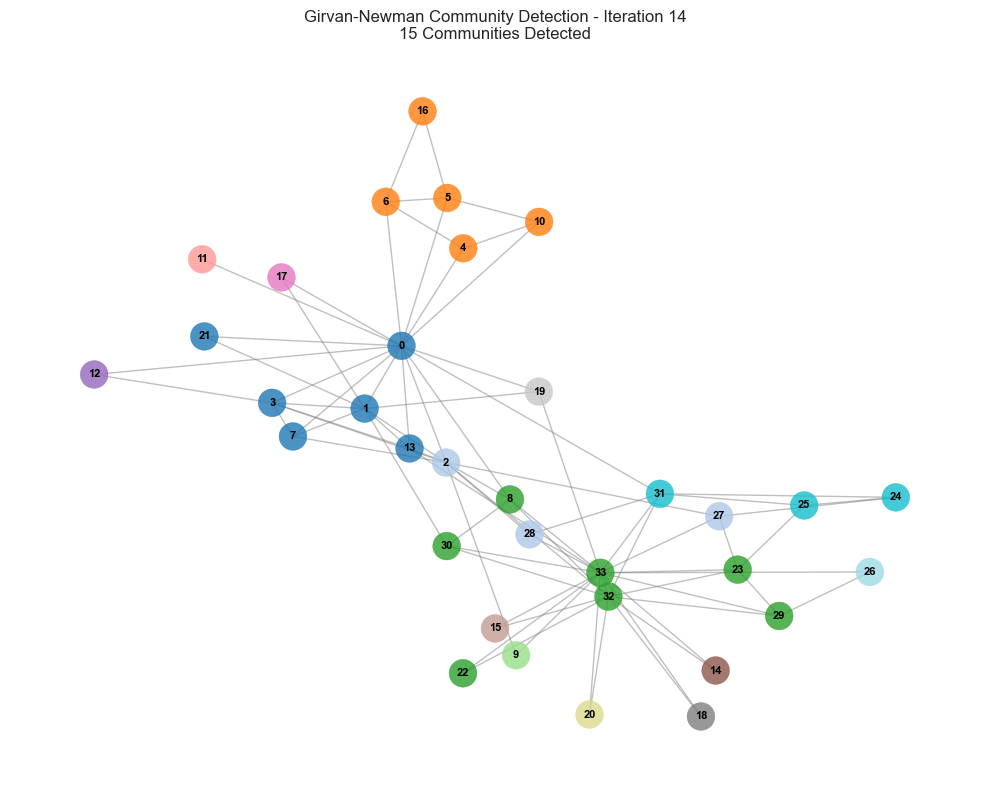


Iteration 14 Communities:
Community 1: [0, 1, 3, 7, 13, 21] (size: 6)
Community 2: [2, 27, 28] (size: 3)
Community 3: [4, 5, 6, 10, 16] (size: 5)
Community 4: [8, 22, 23, 29, 30, 32, 33] (size: 7)
Community 5: [9] (size: 1)
Community 6: [11] (size: 1)
Community 7: [12] (size: 1)
Community 8: [14] (size: 1)
Community 9: [15] (size: 1)
Community 10: [17] (size: 1)
Community 11: [18] (size: 1)
Community 12: [19] (size: 1)
Community 13: [20] (size: 1)
Community 14: [24, 25, 31] (size: 3)
Community 15: [26] (size: 1)
--------------------------------------------------


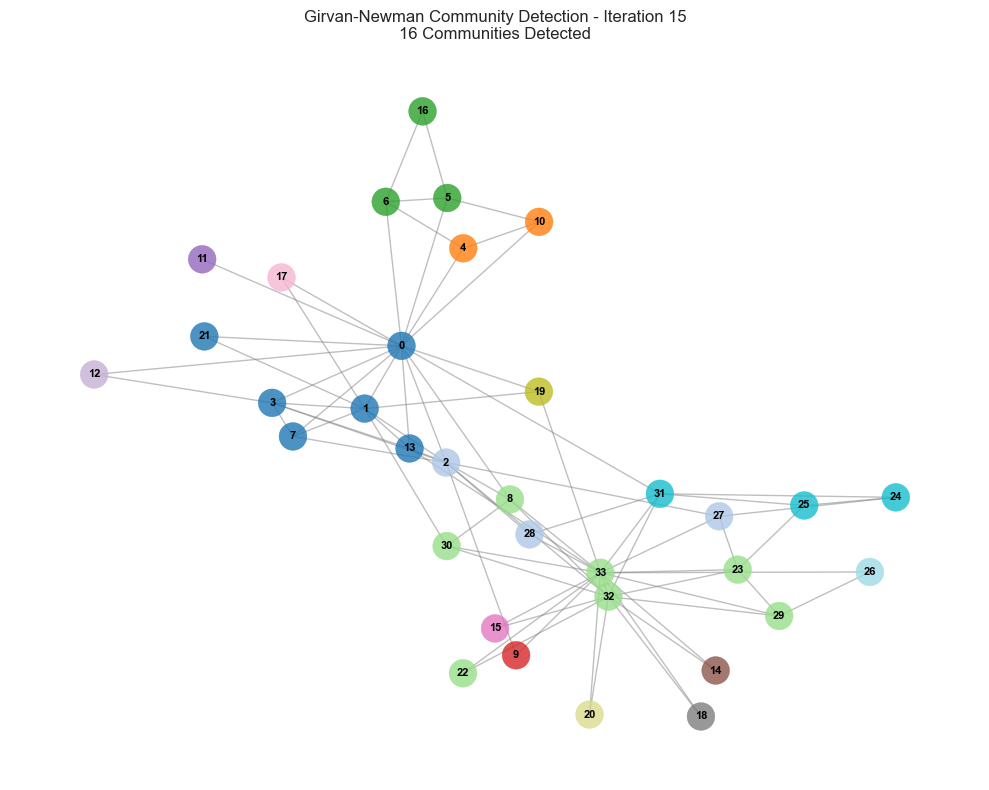


Iteration 15 Communities:
Community 1: [0, 1, 3, 7, 13, 21] (size: 6)
Community 2: [2, 27, 28] (size: 3)
Community 3: [4, 10] (size: 2)
Community 4: [5, 6, 16] (size: 3)
Community 5: [8, 22, 23, 29, 30, 32, 33] (size: 7)
Community 6: [9] (size: 1)
Community 7: [11] (size: 1)
Community 8: [12] (size: 1)
Community 9: [14] (size: 1)
Community 10: [15] (size: 1)
Community 11: [17] (size: 1)
Community 12: [18] (size: 1)
Community 13: [19] (size: 1)
Community 14: [20] (size: 1)
Community 15: [24, 25, 31] (size: 3)
Community 16: [26] (size: 1)
--------------------------------------------------


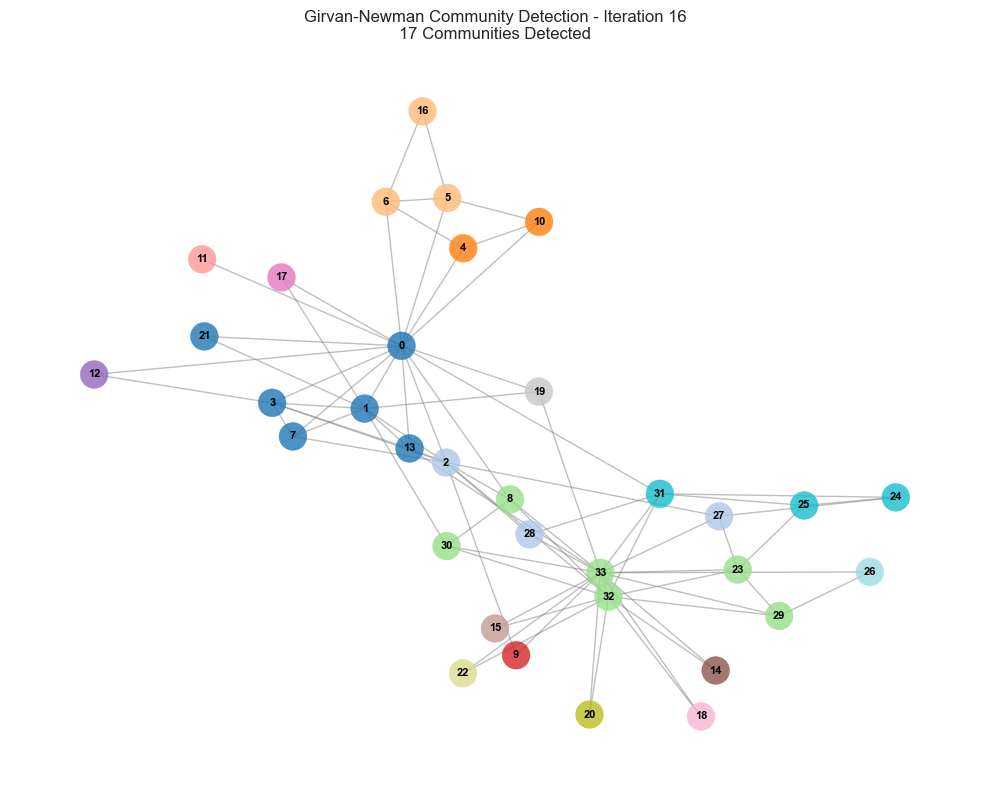


Iteration 16 Communities:
Community 1: [0, 1, 3, 7, 13, 21] (size: 6)
Community 2: [2, 27, 28] (size: 3)
Community 3: [4, 10] (size: 2)
Community 4: [5, 6, 16] (size: 3)
Community 5: [8, 23, 29, 30, 32, 33] (size: 6)
Community 6: [9] (size: 1)
Community 7: [11] (size: 1)
Community 8: [12] (size: 1)
Community 9: [14] (size: 1)
Community 10: [15] (size: 1)
Community 11: [17] (size: 1)
Community 12: [18] (size: 1)
Community 13: [19] (size: 1)
Community 14: [20] (size: 1)
Community 15: [22] (size: 1)
Community 16: [24, 25, 31] (size: 3)
Community 17: [26] (size: 1)
--------------------------------------------------


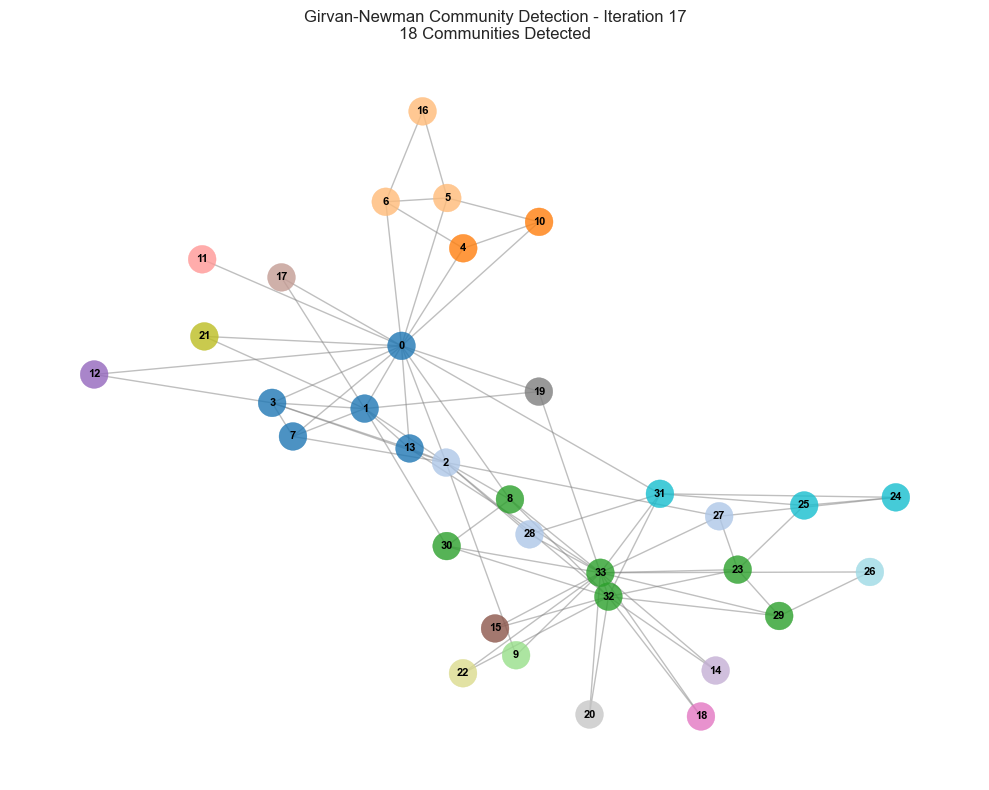


Iteration 17 Communities:
Community 1: [0, 1, 3, 7, 13] (size: 5)
Community 2: [2, 27, 28] (size: 3)
Community 3: [4, 10] (size: 2)
Community 4: [5, 6, 16] (size: 3)
Community 5: [8, 23, 29, 30, 32, 33] (size: 6)
Community 6: [9] (size: 1)
Community 7: [11] (size: 1)
Community 8: [12] (size: 1)
Community 9: [14] (size: 1)
Community 10: [15] (size: 1)
Community 11: [17] (size: 1)
Community 12: [18] (size: 1)
Community 13: [19] (size: 1)
Community 14: [20] (size: 1)
Community 15: [21] (size: 1)
Community 16: [22] (size: 1)
Community 17: [24, 25, 31] (size: 3)
Community 18: [26] (size: 1)
--------------------------------------------------


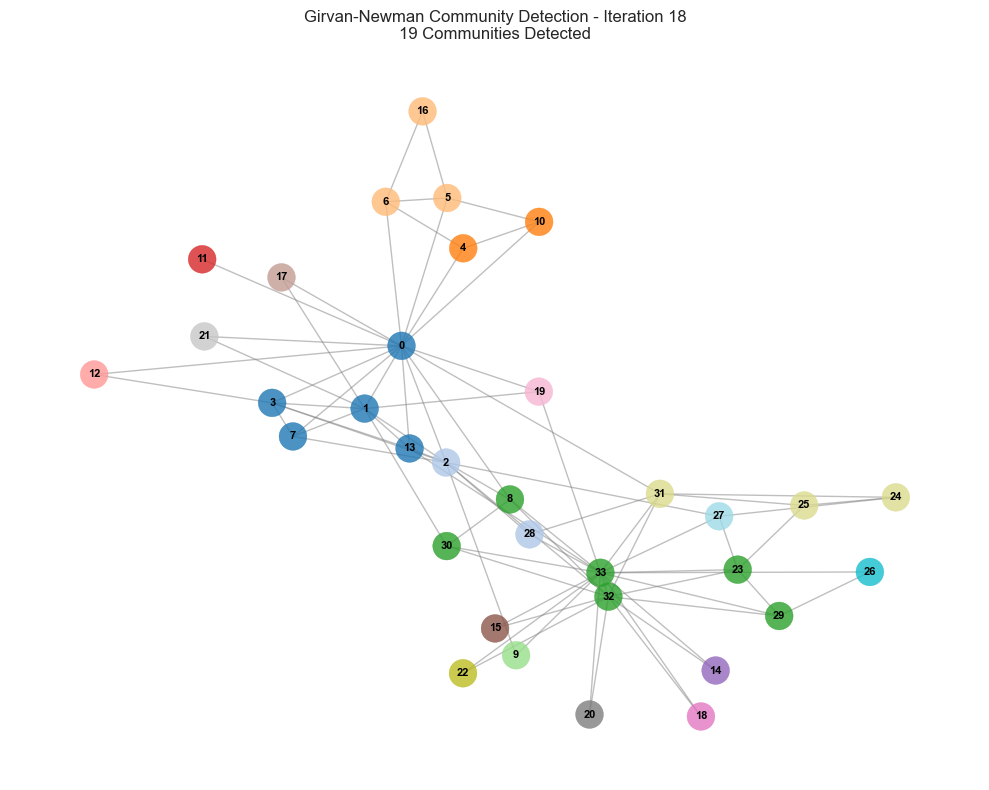


Iteration 18 Communities:
Community 1: [0, 1, 3, 7, 13] (size: 5)
Community 2: [2, 28] (size: 2)
Community 3: [4, 10] (size: 2)
Community 4: [5, 6, 16] (size: 3)
Community 5: [8, 23, 29, 30, 32, 33] (size: 6)
Community 6: [9] (size: 1)
Community 7: [11] (size: 1)
Community 8: [12] (size: 1)
Community 9: [14] (size: 1)
Community 10: [15] (size: 1)
Community 11: [17] (size: 1)
Community 12: [18] (size: 1)
Community 13: [19] (size: 1)
Community 14: [20] (size: 1)
Community 15: [21] (size: 1)
Community 16: [22] (size: 1)
Community 17: [24, 25, 31] (size: 3)
Community 18: [26] (size: 1)
Community 19: [27] (size: 1)
--------------------------------------------------


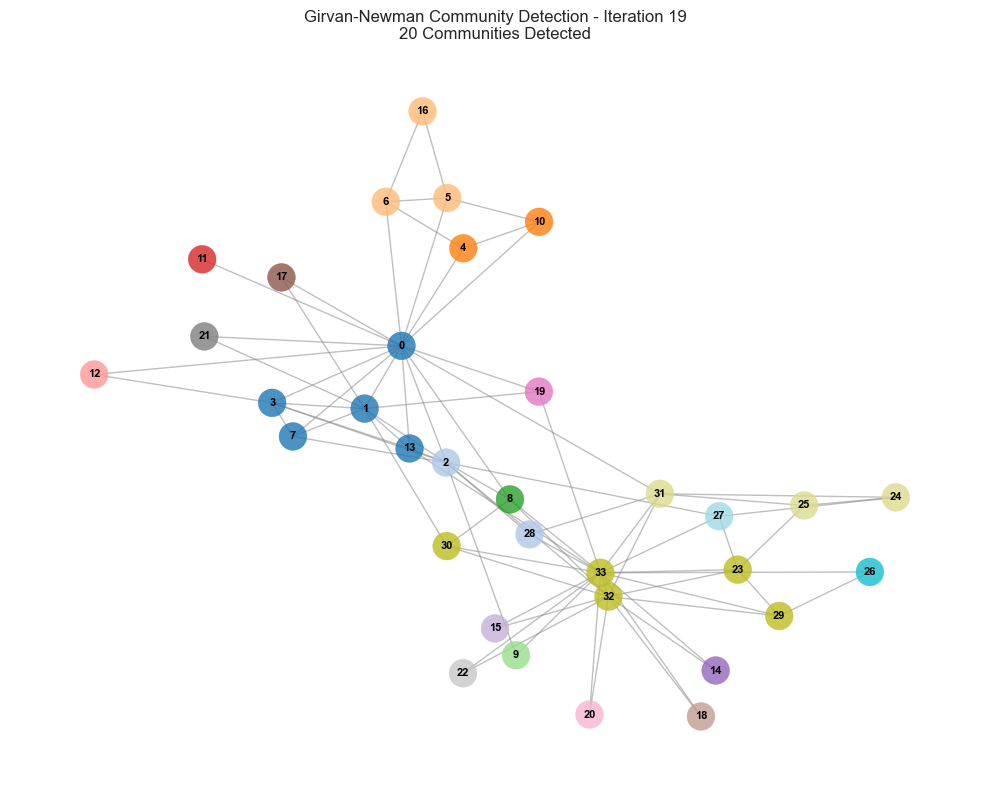


Iteration 19 Communities:
Community 1: [0, 1, 3, 7, 13] (size: 5)
Community 2: [2, 28] (size: 2)
Community 3: [4, 10] (size: 2)
Community 4: [5, 6, 16] (size: 3)
Community 5: [8] (size: 1)
Community 6: [9] (size: 1)
Community 7: [11] (size: 1)
Community 8: [12] (size: 1)
Community 9: [14] (size: 1)
Community 10: [15] (size: 1)
Community 11: [17] (size: 1)
Community 12: [18] (size: 1)
Community 13: [19] (size: 1)
Community 14: [20] (size: 1)
Community 15: [21] (size: 1)
Community 16: [22] (size: 1)
Community 17: [23, 29, 30, 32, 33] (size: 5)
Community 18: [24, 25, 31] (size: 3)
Community 19: [26] (size: 1)
Community 20: [27] (size: 1)
--------------------------------------------------


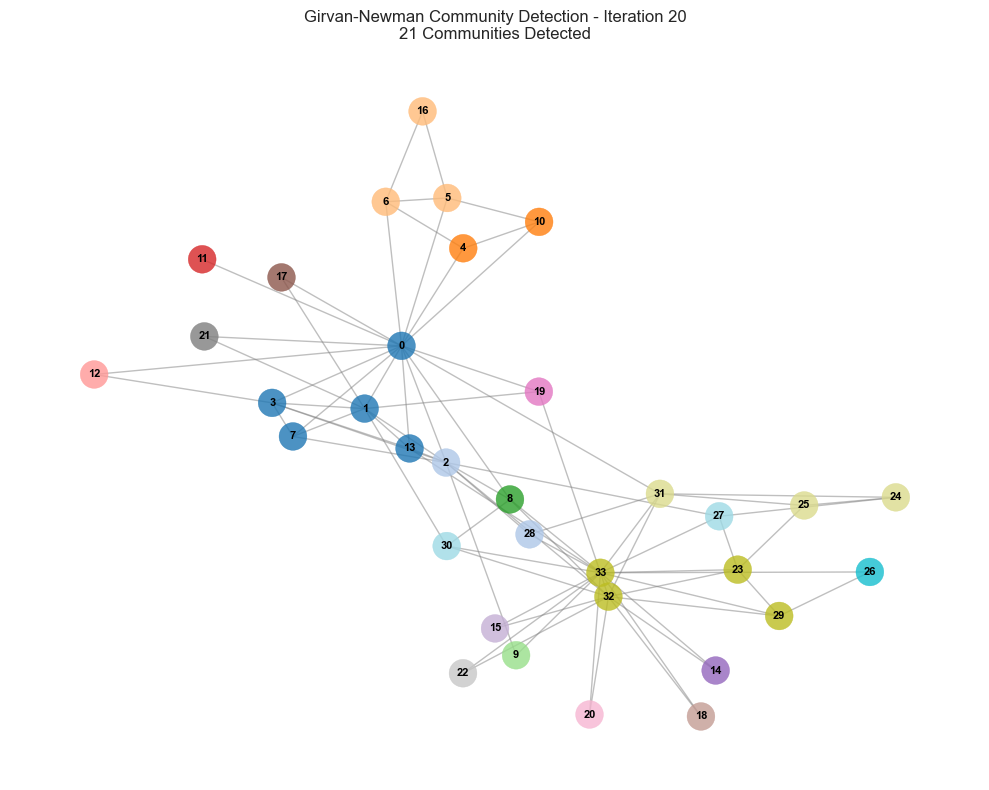


Iteration 20 Communities:
Community 1: [0, 1, 3, 7, 13] (size: 5)
Community 2: [2, 28] (size: 2)
Community 3: [4, 10] (size: 2)
Community 4: [5, 6, 16] (size: 3)
Community 5: [8] (size: 1)
Community 6: [9] (size: 1)
Community 7: [11] (size: 1)
Community 8: [12] (size: 1)
Community 9: [14] (size: 1)
Community 10: [15] (size: 1)
Community 11: [17] (size: 1)
Community 12: [18] (size: 1)
Community 13: [19] (size: 1)
Community 14: [20] (size: 1)
Community 15: [21] (size: 1)
Community 16: [22] (size: 1)
Community 17: [23, 29, 32, 33] (size: 4)
Community 18: [24, 25, 31] (size: 3)
Community 19: [26] (size: 1)
Community 20: [27] (size: 1)
Community 21: [30] (size: 1)
--------------------------------------------------


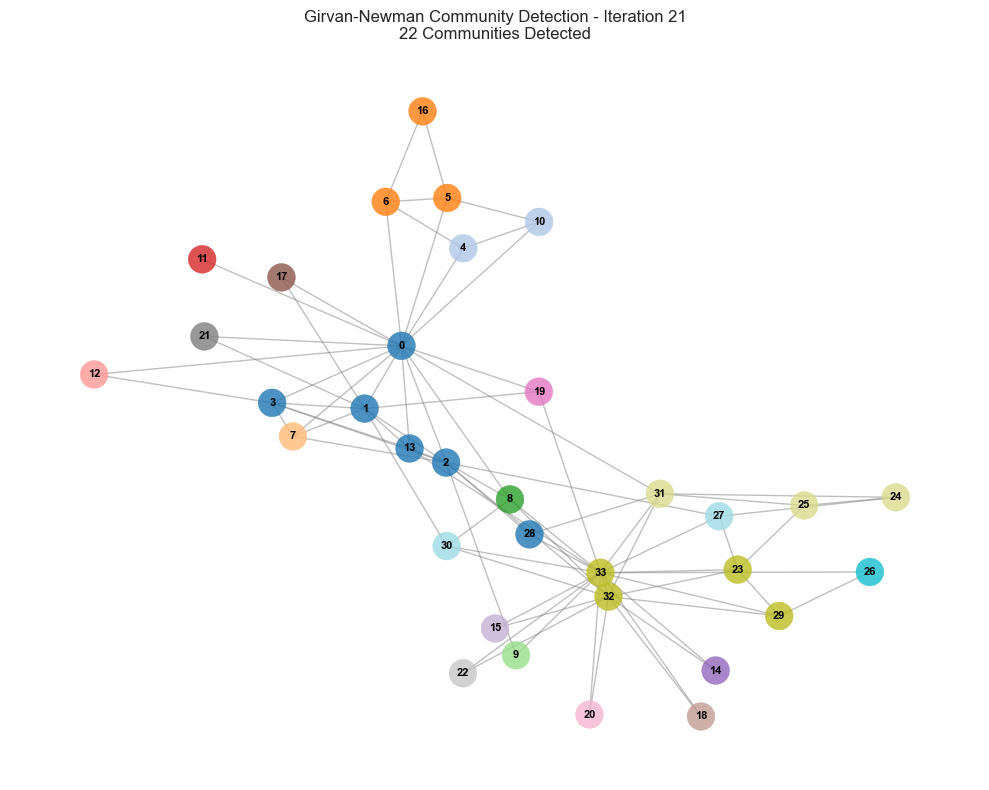


Iteration 21 Communities:
Community 1: [0, 1, 3, 13] (size: 4)
Community 2: [2, 28] (size: 2)
Community 3: [4, 10] (size: 2)
Community 4: [5, 6, 16] (size: 3)
Community 5: [7] (size: 1)
Community 6: [8] (size: 1)
Community 7: [9] (size: 1)
Community 8: [11] (size: 1)
Community 9: [12] (size: 1)
Community 10: [14] (size: 1)
Community 11: [15] (size: 1)
Community 12: [17] (size: 1)
Community 13: [18] (size: 1)
Community 14: [19] (size: 1)
Community 15: [20] (size: 1)
Community 16: [21] (size: 1)
Community 17: [22] (size: 1)
Community 18: [23, 29, 32, 33] (size: 4)
Community 19: [24, 25, 31] (size: 3)
Community 20: [26] (size: 1)
Community 21: [27] (size: 1)
Community 22: [30] (size: 1)
--------------------------------------------------


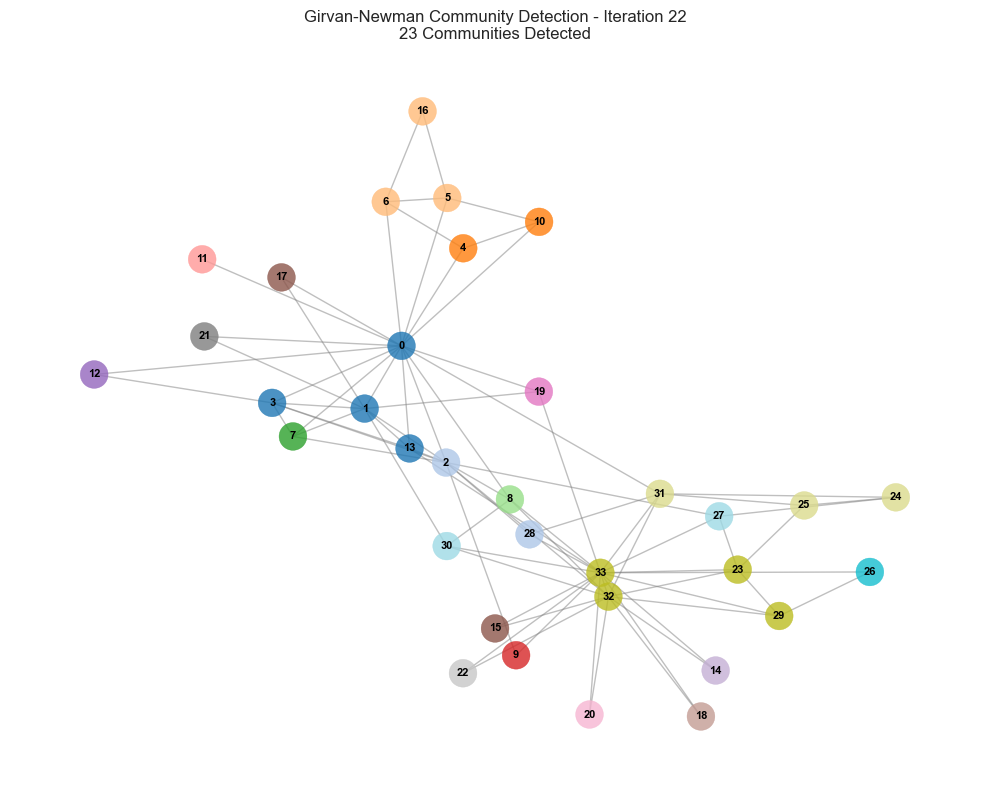


Iteration 22 Communities:
Community 1: [0] (size: 1)
Community 2: [1, 3, 13] (size: 3)
Community 3: [2, 28] (size: 2)
Community 4: [4, 10] (size: 2)
Community 5: [5, 6, 16] (size: 3)
Community 6: [7] (size: 1)
Community 7: [8] (size: 1)
Community 8: [9] (size: 1)
Community 9: [11] (size: 1)
Community 10: [12] (size: 1)
Community 11: [14] (size: 1)
Community 12: [15] (size: 1)
Community 13: [17] (size: 1)
Community 14: [18] (size: 1)
Community 15: [19] (size: 1)
Community 16: [20] (size: 1)
Community 17: [21] (size: 1)
Community 18: [22] (size: 1)
Community 19: [23, 29, 32, 33] (size: 4)
Community 20: [24, 25, 31] (size: 3)
Community 21: [26] (size: 1)
Community 22: [27] (size: 1)
Community 23: [30] (size: 1)
--------------------------------------------------


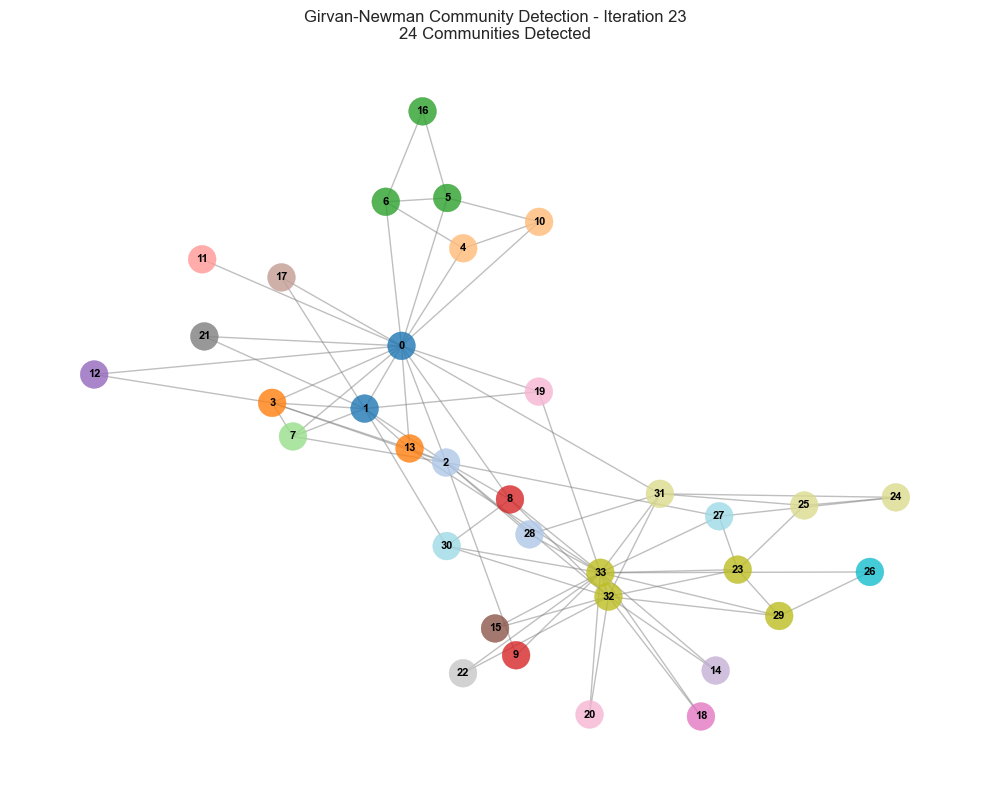


Iteration 23 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2, 28] (size: 2)
Community 4: [3, 13] (size: 2)
Community 5: [4, 10] (size: 2)
Community 6: [5, 6, 16] (size: 3)
Community 7: [7] (size: 1)
Community 8: [8] (size: 1)
Community 9: [9] (size: 1)
Community 10: [11] (size: 1)
Community 11: [12] (size: 1)
Community 12: [14] (size: 1)
Community 13: [15] (size: 1)
Community 14: [17] (size: 1)
Community 15: [18] (size: 1)
Community 16: [19] (size: 1)
Community 17: [20] (size: 1)
Community 18: [21] (size: 1)
Community 19: [22] (size: 1)
Community 20: [23, 29, 32, 33] (size: 4)
Community 21: [24, 25, 31] (size: 3)
Community 22: [26] (size: 1)
Community 23: [27] (size: 1)
Community 24: [30] (size: 1)
--------------------------------------------------


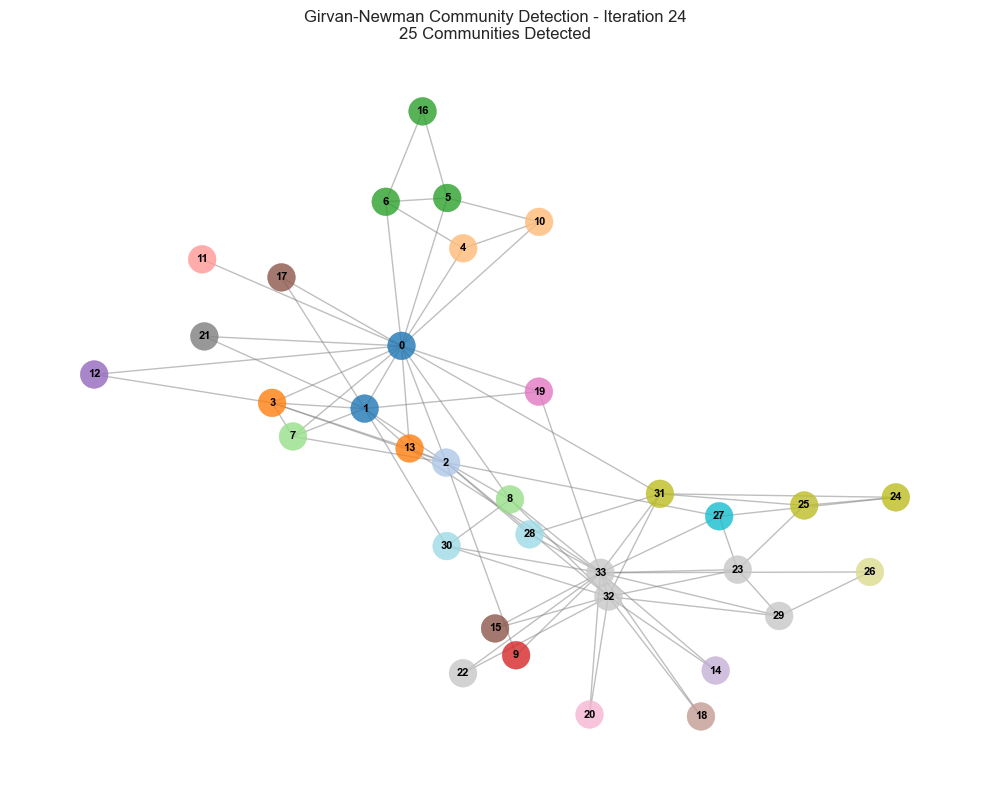


Iteration 24 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3, 13] (size: 2)
Community 5: [4, 10] (size: 2)
Community 6: [5, 6, 16] (size: 3)
Community 7: [7] (size: 1)
Community 8: [8] (size: 1)
Community 9: [9] (size: 1)
Community 10: [11] (size: 1)
Community 11: [12] (size: 1)
Community 12: [14] (size: 1)
Community 13: [15] (size: 1)
Community 14: [17] (size: 1)
Community 15: [18] (size: 1)
Community 16: [19] (size: 1)
Community 17: [20] (size: 1)
Community 18: [21] (size: 1)
Community 19: [22] (size: 1)
Community 20: [23, 29, 32, 33] (size: 4)
Community 21: [24, 25, 31] (size: 3)
Community 22: [26] (size: 1)
Community 23: [27] (size: 1)
Community 24: [28] (size: 1)
Community 25: [30] (size: 1)
--------------------------------------------------


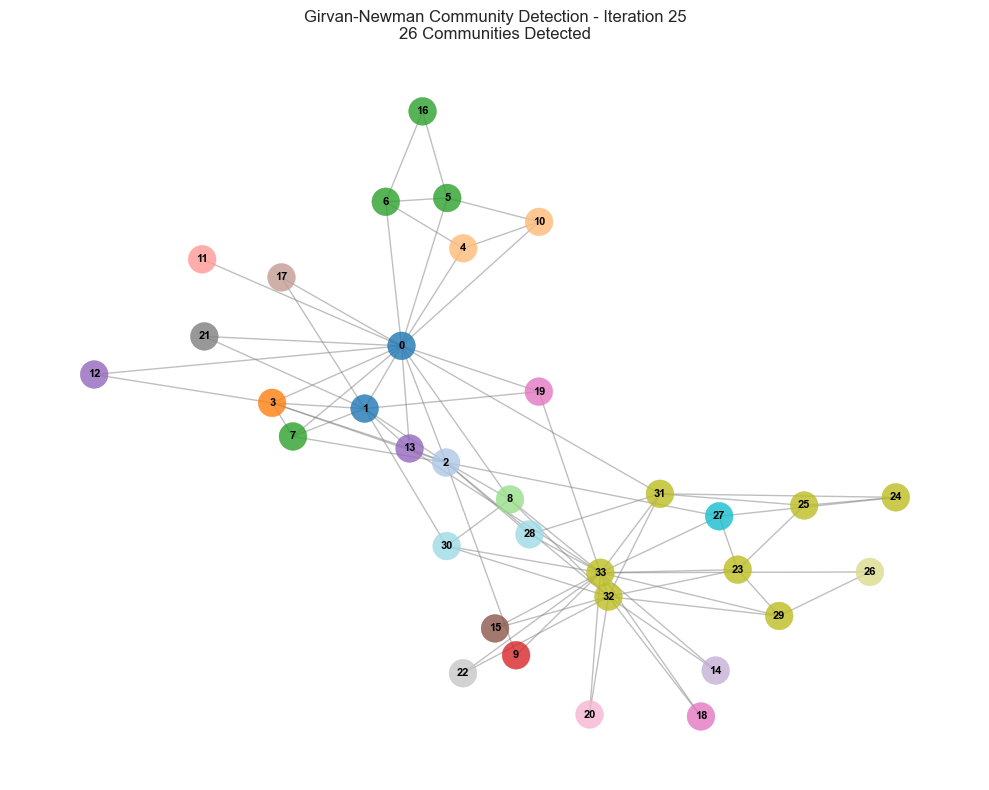


Iteration 25 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3] (size: 1)
Community 5: [4, 10] (size: 2)
Community 6: [5, 6, 16] (size: 3)
Community 7: [7] (size: 1)
Community 8: [8] (size: 1)
Community 9: [9] (size: 1)
Community 10: [11] (size: 1)
Community 11: [12] (size: 1)
Community 12: [13] (size: 1)
Community 13: [14] (size: 1)
Community 14: [15] (size: 1)
Community 15: [17] (size: 1)
Community 16: [18] (size: 1)
Community 17: [19] (size: 1)
Community 18: [20] (size: 1)
Community 19: [21] (size: 1)
Community 20: [22] (size: 1)
Community 21: [23, 29, 32, 33] (size: 4)
Community 22: [24, 25, 31] (size: 3)
Community 23: [26] (size: 1)
Community 24: [27] (size: 1)
Community 25: [28] (size: 1)
Community 26: [30] (size: 1)
--------------------------------------------------


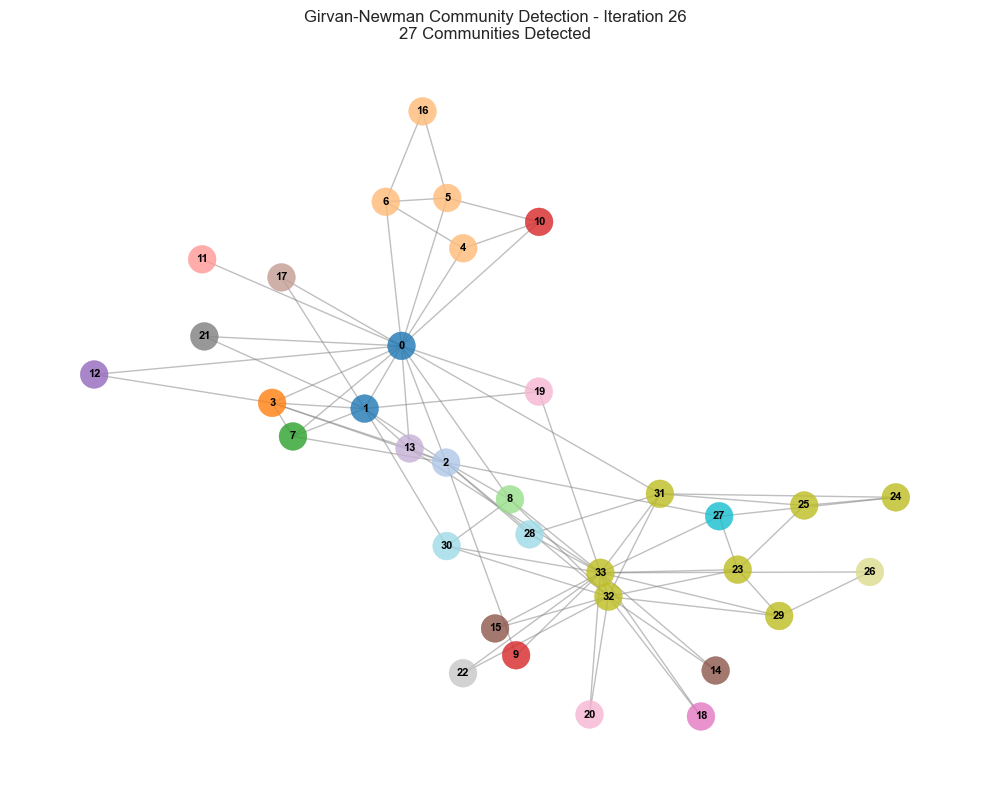


Iteration 26 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3] (size: 1)
Community 5: [4] (size: 1)
Community 6: [5, 6, 16] (size: 3)
Community 7: [7] (size: 1)
Community 8: [8] (size: 1)
Community 9: [9] (size: 1)
Community 10: [10] (size: 1)
Community 11: [11] (size: 1)
Community 12: [12] (size: 1)
Community 13: [13] (size: 1)
Community 14: [14] (size: 1)
Community 15: [15] (size: 1)
Community 16: [17] (size: 1)
Community 17: [18] (size: 1)
Community 18: [19] (size: 1)
Community 19: [20] (size: 1)
Community 20: [21] (size: 1)
Community 21: [22] (size: 1)
Community 22: [23, 29, 32, 33] (size: 4)
Community 23: [24, 25, 31] (size: 3)
Community 24: [26] (size: 1)
Community 25: [27] (size: 1)
Community 26: [28] (size: 1)
Community 27: [30] (size: 1)
--------------------------------------------------


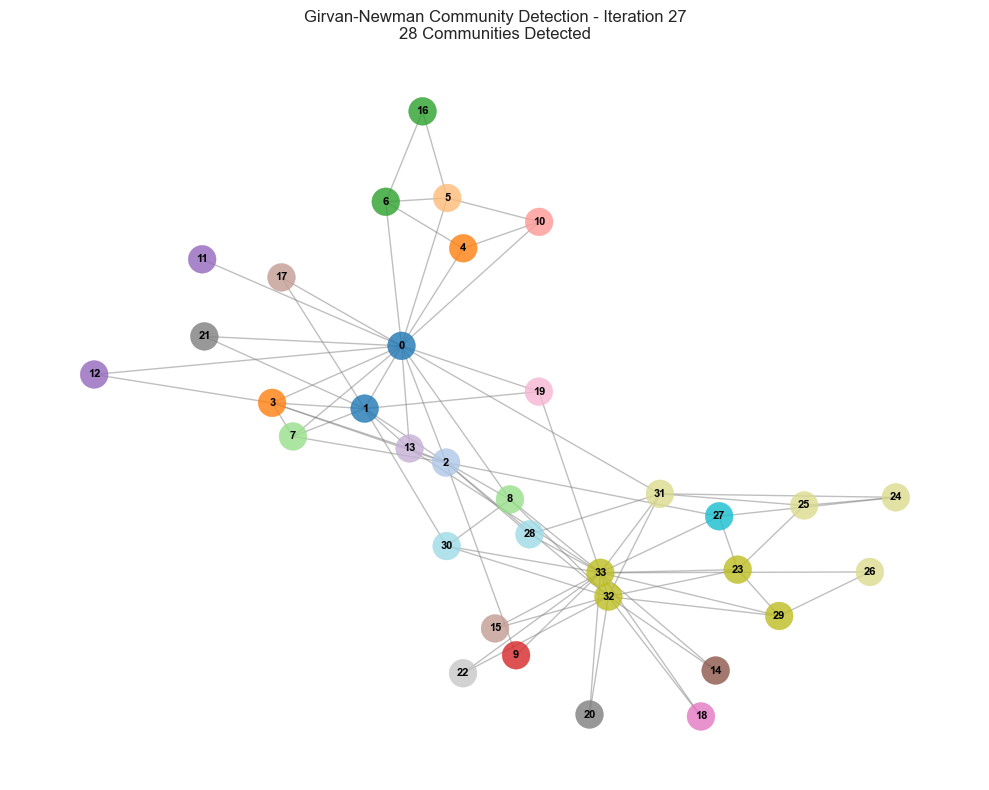


Iteration 27 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3] (size: 1)
Community 5: [4] (size: 1)
Community 6: [5] (size: 1)
Community 7: [6, 16] (size: 2)
Community 8: [7] (size: 1)
Community 9: [8] (size: 1)
Community 10: [9] (size: 1)
Community 11: [10] (size: 1)
Community 12: [11] (size: 1)
Community 13: [12] (size: 1)
Community 14: [13] (size: 1)
Community 15: [14] (size: 1)
Community 16: [15] (size: 1)
Community 17: [17] (size: 1)
Community 18: [18] (size: 1)
Community 19: [19] (size: 1)
Community 20: [20] (size: 1)
Community 21: [21] (size: 1)
Community 22: [22] (size: 1)
Community 23: [23, 29, 32, 33] (size: 4)
Community 24: [24, 25, 31] (size: 3)
Community 25: [26] (size: 1)
Community 26: [27] (size: 1)
Community 27: [28] (size: 1)
Community 28: [30] (size: 1)
--------------------------------------------------


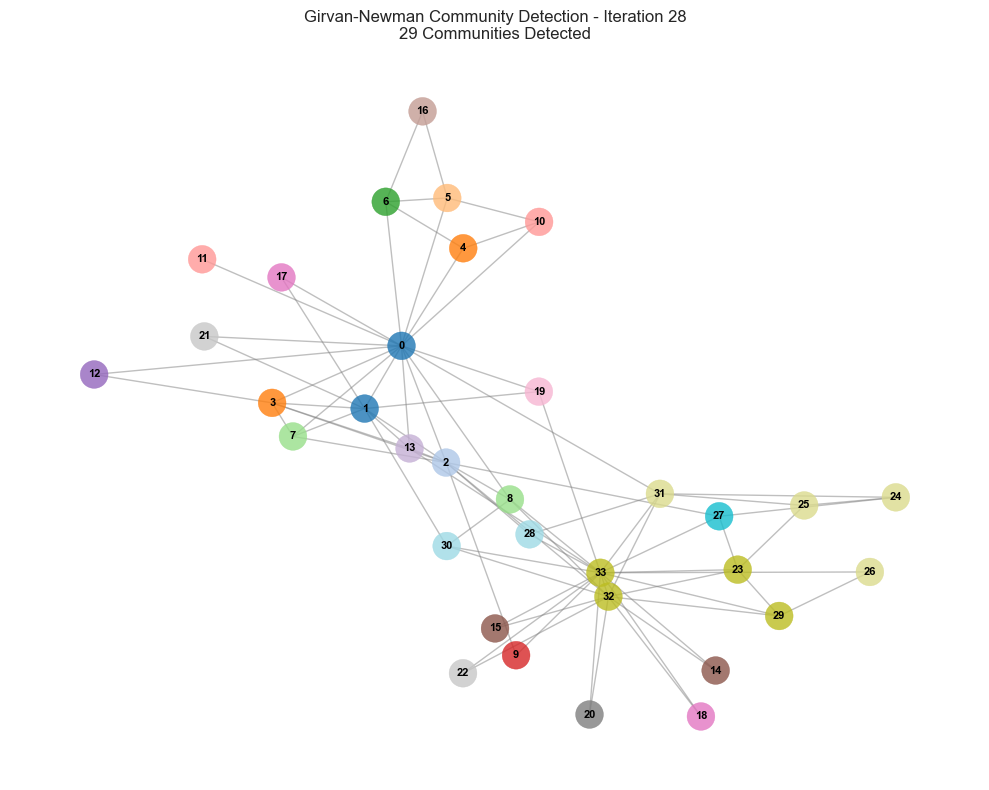


Iteration 28 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3] (size: 1)
Community 5: [4] (size: 1)
Community 6: [5] (size: 1)
Community 7: [6] (size: 1)
Community 8: [7] (size: 1)
Community 9: [8] (size: 1)
Community 10: [9] (size: 1)
Community 11: [10] (size: 1)
Community 12: [11] (size: 1)
Community 13: [12] (size: 1)
Community 14: [13] (size: 1)
Community 15: [14] (size: 1)
Community 16: [15] (size: 1)
Community 17: [16] (size: 1)
Community 18: [17] (size: 1)
Community 19: [18] (size: 1)
Community 20: [19] (size: 1)
Community 21: [20] (size: 1)
Community 22: [21] (size: 1)
Community 23: [22] (size: 1)
Community 24: [23, 29, 32, 33] (size: 4)
Community 25: [24, 25, 31] (size: 3)
Community 26: [26] (size: 1)
Community 27: [27] (size: 1)
Community 28: [28] (size: 1)
Community 29: [30] (size: 1)
--------------------------------------------------


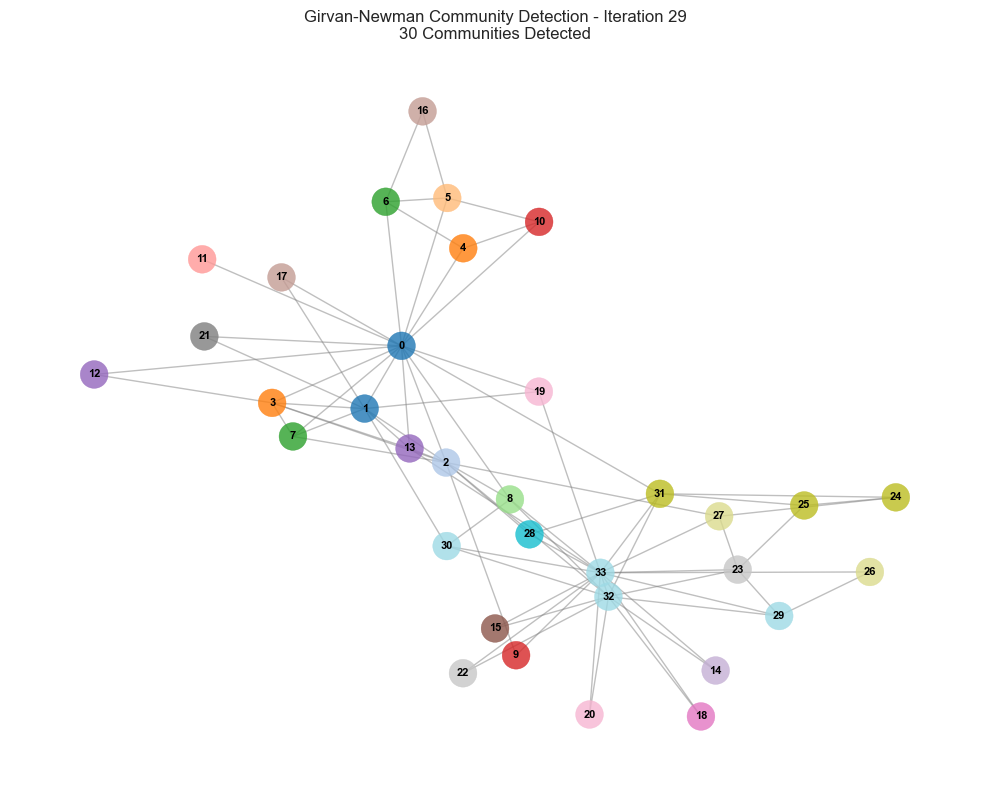


Iteration 29 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3] (size: 1)
Community 5: [4] (size: 1)
Community 6: [5] (size: 1)
Community 7: [6] (size: 1)
Community 8: [7] (size: 1)
Community 9: [8] (size: 1)
Community 10: [9] (size: 1)
Community 11: [10] (size: 1)
Community 12: [11] (size: 1)
Community 13: [12] (size: 1)
Community 14: [13] (size: 1)
Community 15: [14] (size: 1)
Community 16: [15] (size: 1)
Community 17: [16] (size: 1)
Community 18: [17] (size: 1)
Community 19: [18] (size: 1)
Community 20: [19] (size: 1)
Community 21: [20] (size: 1)
Community 22: [21] (size: 1)
Community 23: [22] (size: 1)
Community 24: [23] (size: 1)
Community 25: [24, 25, 31] (size: 3)
Community 26: [26] (size: 1)
Community 27: [27] (size: 1)
Community 28: [28] (size: 1)
Community 29: [29, 32, 33] (size: 3)
Community 30: [30] (size: 1)
--------------------------------------------------


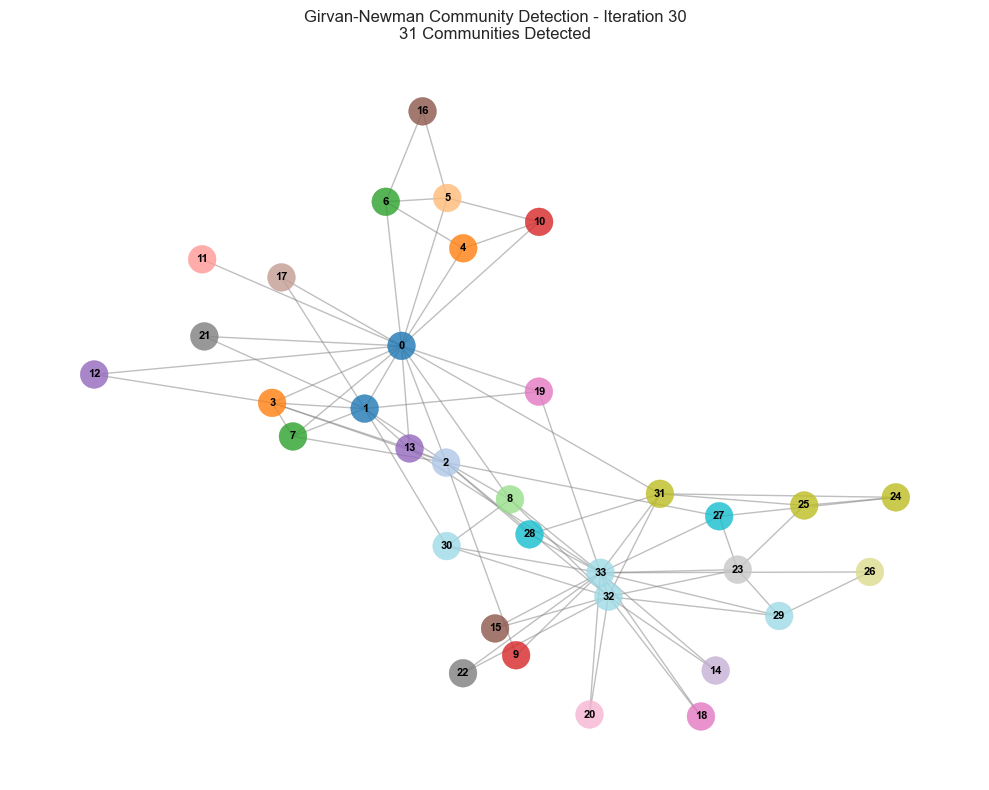


Iteration 30 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3] (size: 1)
Community 5: [4] (size: 1)
Community 6: [5] (size: 1)
Community 7: [6] (size: 1)
Community 8: [7] (size: 1)
Community 9: [8] (size: 1)
Community 10: [9] (size: 1)
Community 11: [10] (size: 1)
Community 12: [11] (size: 1)
Community 13: [12] (size: 1)
Community 14: [13] (size: 1)
Community 15: [14] (size: 1)
Community 16: [15] (size: 1)
Community 17: [16] (size: 1)
Community 18: [17] (size: 1)
Community 19: [18] (size: 1)
Community 20: [19] (size: 1)
Community 21: [20] (size: 1)
Community 22: [21] (size: 1)
Community 23: [22] (size: 1)
Community 24: [23] (size: 1)
Community 25: [24] (size: 1)
Community 26: [25, 31] (size: 2)
Community 27: [26] (size: 1)
Community 28: [27] (size: 1)
Community 29: [28] (size: 1)
Community 30: [29, 32, 33] (size: 3)
Community 31: [30] (size: 1)
--------------------------------------------------


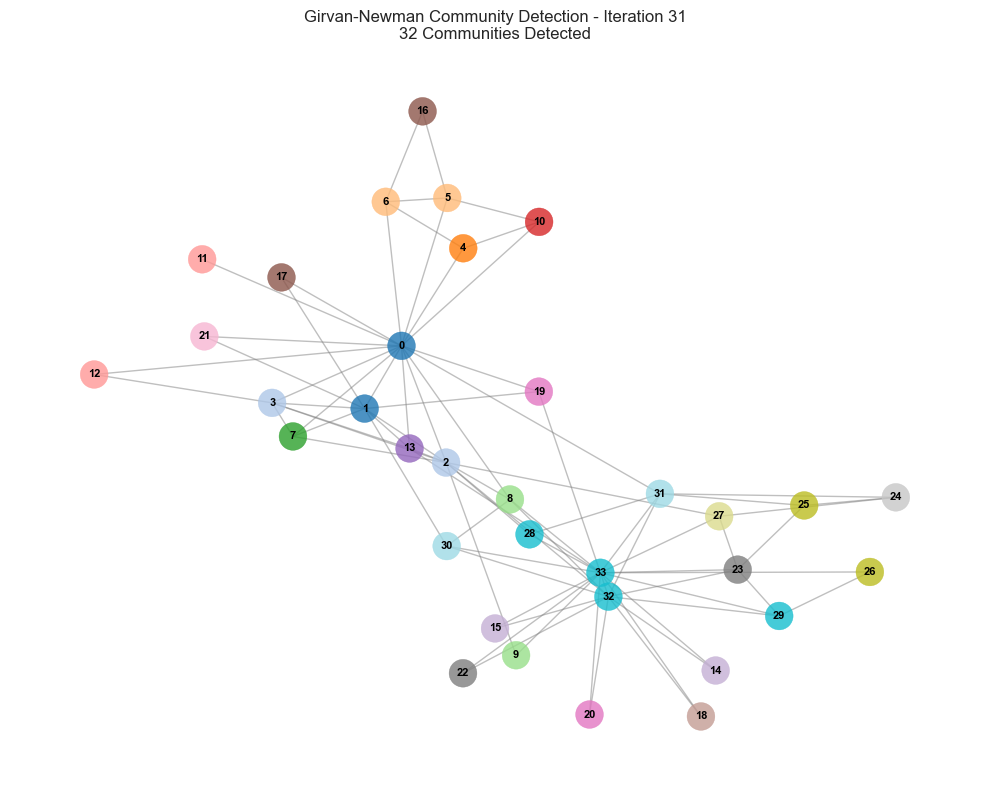


Iteration 31 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3] (size: 1)
Community 5: [4] (size: 1)
Community 6: [5] (size: 1)
Community 7: [6] (size: 1)
Community 8: [7] (size: 1)
Community 9: [8] (size: 1)
Community 10: [9] (size: 1)
Community 11: [10] (size: 1)
Community 12: [11] (size: 1)
Community 13: [12] (size: 1)
Community 14: [13] (size: 1)
Community 15: [14] (size: 1)
Community 16: [15] (size: 1)
Community 17: [16] (size: 1)
Community 18: [17] (size: 1)
Community 19: [18] (size: 1)
Community 20: [19] (size: 1)
Community 21: [20] (size: 1)
Community 22: [21] (size: 1)
Community 23: [22] (size: 1)
Community 24: [23] (size: 1)
Community 25: [24] (size: 1)
Community 26: [25] (size: 1)
Community 27: [26] (size: 1)
Community 28: [27] (size: 1)
Community 29: [28] (size: 1)
Community 30: [29, 32, 33] (size: 3)
Community 31: [30] (size: 1)
Community 32: [31] (size: 1)
--------------------------------------------------


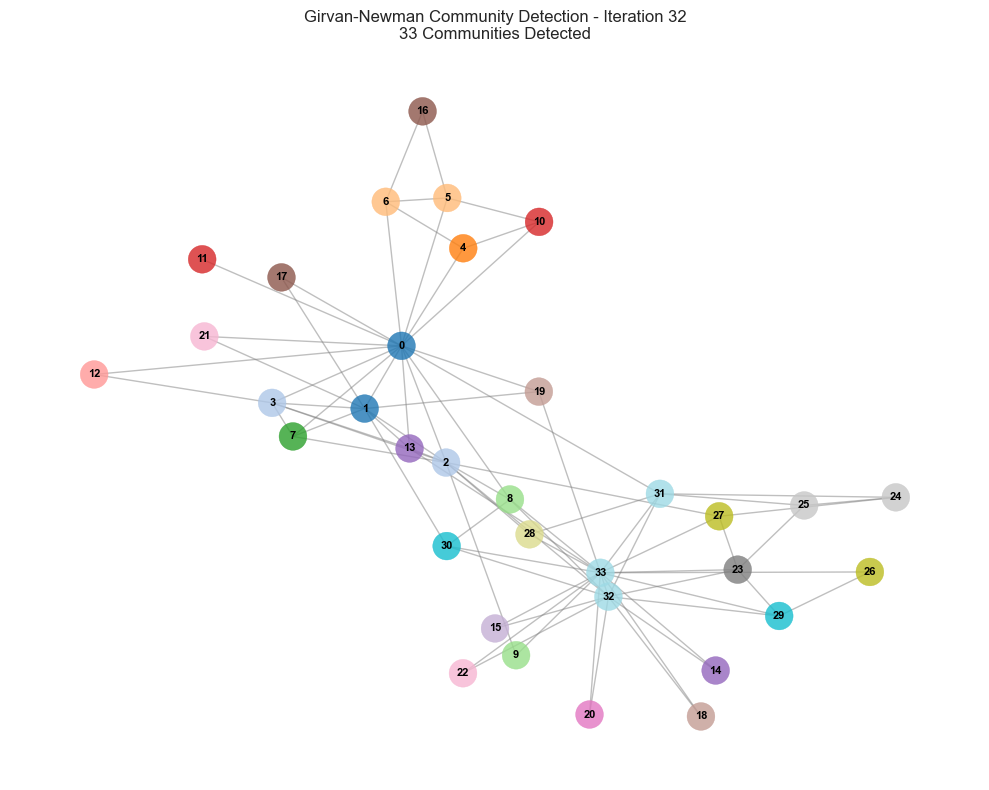


Iteration 32 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3] (size: 1)
Community 5: [4] (size: 1)
Community 6: [5] (size: 1)
Community 7: [6] (size: 1)
Community 8: [7] (size: 1)
Community 9: [8] (size: 1)
Community 10: [9] (size: 1)
Community 11: [10] (size: 1)
Community 12: [11] (size: 1)
Community 13: [12] (size: 1)
Community 14: [13] (size: 1)
Community 15: [14] (size: 1)
Community 16: [15] (size: 1)
Community 17: [16] (size: 1)
Community 18: [17] (size: 1)
Community 19: [18] (size: 1)
Community 20: [19] (size: 1)
Community 21: [20] (size: 1)
Community 22: [21] (size: 1)
Community 23: [22] (size: 1)
Community 24: [23] (size: 1)
Community 25: [24] (size: 1)
Community 26: [25] (size: 1)
Community 27: [26] (size: 1)
Community 28: [27] (size: 1)
Community 29: [28] (size: 1)
Community 30: [29] (size: 1)
Community 31: [30] (size: 1)
Community 32: [31] (size: 1)
Community 33: [32, 33] (size: 2)
-------------------------------

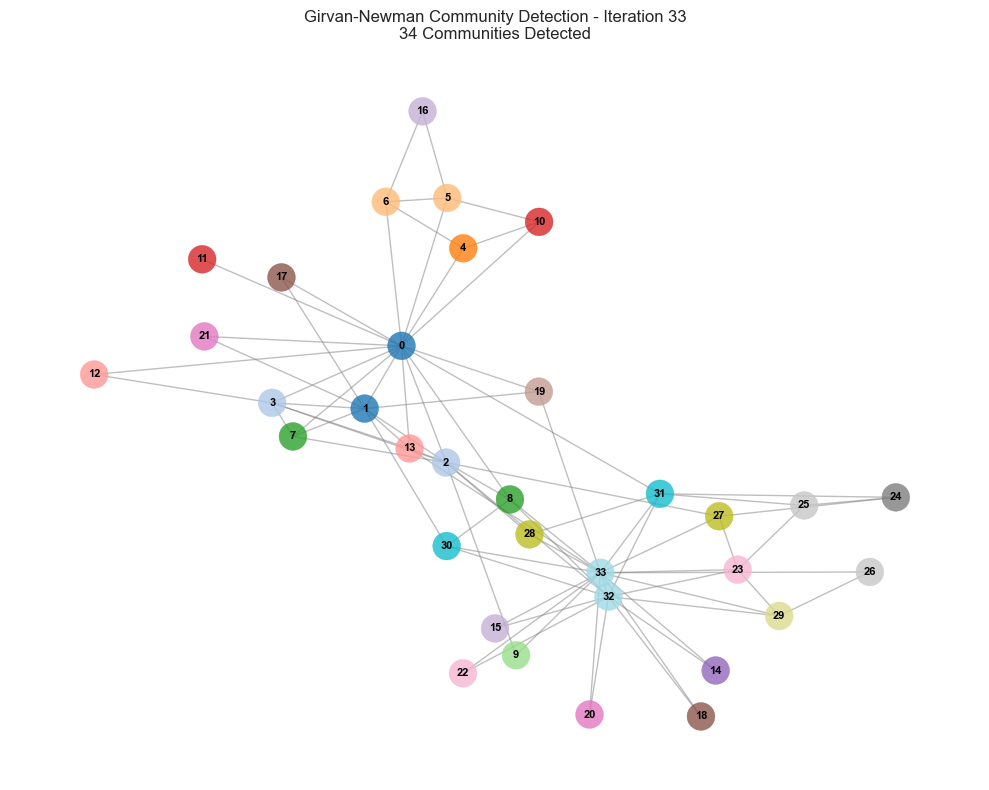


Iteration 33 Communities:
Community 1: [0] (size: 1)
Community 2: [1] (size: 1)
Community 3: [2] (size: 1)
Community 4: [3] (size: 1)
Community 5: [4] (size: 1)
Community 6: [5] (size: 1)
Community 7: [6] (size: 1)
Community 8: [7] (size: 1)
Community 9: [8] (size: 1)
Community 10: [9] (size: 1)
Community 11: [10] (size: 1)
Community 12: [11] (size: 1)
Community 13: [12] (size: 1)
Community 14: [13] (size: 1)
Community 15: [14] (size: 1)
Community 16: [15] (size: 1)
Community 17: [16] (size: 1)
Community 18: [17] (size: 1)
Community 19: [18] (size: 1)
Community 20: [19] (size: 1)
Community 21: [20] (size: 1)
Community 22: [21] (size: 1)
Community 23: [22] (size: 1)
Community 24: [23] (size: 1)
Community 25: [24] (size: 1)
Community 26: [25] (size: 1)
Community 27: [26] (size: 1)
Community 28: [27] (size: 1)
Community 29: [28] (size: 1)
Community 30: [29] (size: 1)
Community 31: [30] (size: 1)
Community 32: [31] (size: 1)
Community 33: [32] (size: 1)
Community 34: [33] (size: 1)
------

In [206]:
# Visualize graph after each iteration
for i, communities in enumerate(splits, 1):
    plot_communities(G, communities, i)


In [207]:
# Analyze community evolution
def analyze_communities(splits):
    """Analyze how communities evolve through iterations"""
    print("\n=== COMMUNITY EVOLUTION ANALYSIS ===")
    
    for i, communities in enumerate(splits, 1):
        sizes = [len(community) for community in communities]
        print(f"Iteration {i}:")
        print(f"  Number of communities: {len(communities)}")
        print(f"  Community sizes: {sorted(sizes, reverse=True)}")
        print(f"  Largest community: {max(sizes)} nodes")
        print(f"  Smallest community: {min(sizes)} nodes")
        print(f"  Average community size: {np.mean(sizes):.2f}")
        
        # Calculate modularity for this partition
        partition = {}
        for idx, community in enumerate(communities):
            for node in community:
                partition[node] = idx
        
        modularity = nx.algorithms.community.modularity(G, communities)
        print(f"  Modularity: {modularity:.4f}")
        print()

analyze_communities(splits)



=== COMMUNITY EVOLUTION ANALYSIS ===
Iteration 1:
  Number of communities: 2
  Community sizes: [19, 15]
  Largest community: 19 nodes
  Smallest community: 15 nodes
  Average community size: 17.00
  Modularity: 0.3477

Iteration 2:
  Number of communities: 3
  Community sizes: [18, 15, 1]
  Largest community: 18 nodes
  Smallest community: 1 nodes
  Average community size: 11.33
  Modularity: 0.3423

Iteration 3:
  Number of communities: 4
  Community sizes: [18, 10, 5, 1]
  Largest community: 18 nodes
  Smallest community: 1 nodes
  Average community size: 8.50
  Modularity: 0.3581

Iteration 4:
  Number of communities: 5
  Community sizes: [12, 10, 6, 5, 1]
  Largest community: 12 nodes
  Smallest community: 1 nodes
  Average community size: 6.80
  Modularity: 0.3850

Iteration 5:
  Number of communities: 6
  Community sizes: [12, 9, 6, 5, 1, 1]
  Largest community: 12 nodes
  Smallest community: 1 nodes
  Average community size: 5.67
  Modularity: 0.3758

Iteration 6:
  Number of 

# 🔬 Advanced Topics

---

## 1. 📌 Graph Algorithms
- **Shortest Path Algorithms**: Dijkstra, Bellman-Ford  
- **Minimum Spanning Tree**: Kruskal, Prim  
- **Maximum Flow**: Ford-Fulkerson  
- **Graph Coloring**  
- **Traveling Salesman Problem**

---

## 2. 🧠 Graph Neural Networks
- **Graph Convolutional Networks (GCN)**  
- **Graph Attention Networks (GAT)**  
- **GraphSAGE**  
- **Graph Transformer**

---

## 3. 🛠️ Tools and Libraries

### Python Libraries
- **NetworkX**: General-purpose graph analysis  
- **igraph**: Fast graph algorithms  
- **graph-tool**: High-performance graph analysis  
- **PyTorch Geometric**: Graph neural networks  
- **DGL (Deep Graph Library)**  

### Visualization Tools
- **Gephi**: Interactive graph visualization  
- **Cytoscape**: Biological network analysis  
- **D3.js**: Web-based visualizations  
- **Plotly**: Interactive Python visualizations

---

## 4. 🌍 Real-World Applications
- Social Media Analysis  
- Recommendation Systems  
- Fraud Detection  
- Drug Discovery  
- Supply Chain Optimization  
- Knowledge Graphs


# Summary and Key Takeaways

## What We Covered
- **Graph Types**: Undirected, directed, weighted, bipartite, multigraphs
- **Graph Properties**: Degree distribution, connectivity, clustering
- **Centrality Measures**: Degree, betweenness, closeness, eigenvector centrality
- **Assortativity**: Degree correlation patterns in networks
- **Community Detection**: Methods to identify groups in networks

## Key Insights
1. **Graphs capture relational structure** of real-world systems
2. **Different metrics reveal unique insights** about network behavior
3. **Practical tools like NetworkX** are essential for exploration
4. **Understanding structure is the first step** to understanding behavior

## Next Steps
- Explore specialized graph algorithms for your domain
- Practice with real-world datasets
- Learn about graph neural networks for advanced applications
- Experiment with different visualization tools
